<a href="https://colab.research.google.com/github/JULIANNEBBORGES/TELECOM_X_BR_P2/blob/main/Telecom_X_%7C_Previs%C3%A3o_de_Evas%C3%A3o_de_Clientes_(Churn)_Parte_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Desafio Telecom X | Previsão de Evasão de Clientes (Churn) - Parte 2
> Hands-on challenge: aplicabilidade de conhecimentos fundamentais de estatística, regressão linear e machine learning, além de habilidades essenciais de ciência de dados, em um cenário de negócios real.<br>
> Challenge Based Learning

## 📚 Preparaçao do ambiente:

In [48]:
#Importando as bibliotecas:
import numpy as np
import pandas as pd # Para Manipulação de Dados
import json # Manipulação de JSON
import matplotlib.pyplot as plt
import seaborn as sns
import requests
!pip install squarify > /dev/null
import squarify
import math
import os
import gc
import random
import pprint

# Bibliotecas de avisos
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # Para Estatística
from scipy.stats import chi2_contingency        # calcula a estatística qui-quadrado e o valor p para o teste de hipótese

"""Plotly"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

"""Scikit-learn"""
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

## 📚 Extração:

In [49]:
json_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

try:
    df = pd.read_json(json_url)
    print("➡️ Dados carregados com sucesso! Primeiras 5 linhas:")
    print()
    print(df.head())
    print()
    print("➡️ Nomes das colunas originais (antes de desaninhar):")
    print(df.columns.tolist())
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    print("Verifique se a URL raw está correta e se o JSON está bem formatado.")

➡️ Dados carregados com sucesso! Primeiras 5 linhas:

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'Int

> 📚** DADOS ANINHADOS** <br>

>> O retorno acima demosntra que as colunas ('customer', 'phone', 'internet', 'account') contêm dados aninhados - no formato de dicionários ou estruturas JSON dentro de cada célula. <br>
>> Para realizar análises tabulares eficazes, é imprescindível "achatar" ou desaninhar esses dados, transformando as chaves dentro dos dicionários aninhados em colunas separadas no DataFrame principal.<br>
>> Para desaninha-los facilitando a análise utilizou-se a função `[json_normalize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)` do Pandas, que é ideal para converter dados JSON semi-estruturados em uma tabela plana.

## 📚 Tratamento (estruturação) do processo de ETL:

### Processo de Desaninhamento:



>> 1. Desaninhar a coluna 'customer'
>>> 'gender', 'SeniorCitizen', 'Partner', 'Dependents'

>> 2. Desaninhar a coluna 'phone'
>>> Esta coluna contém 'PhoneService', 'MultipleLines'

>> 3. Desaninhar a coluna 'internet'
>>> Esta coluna contém 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

>> 4. Desaninhar a coluna 'account'
>>> Esta coluna contém 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges'


In [50]:
from pandas import json_normalize

# --- 1. Desaninhar a coluna 'customer' ---

df_customer = json_normalize(df['customer'])
print("\n ➡️ DataFrame desaninhado de 'customer' (primeiras 5 linhas):")
print() # Adiciona um espaço em branco
display(df_customer.head(5))
print() # Adiciona um espaço em branco

# --- 2. Desaninhar a coluna 'phone' ---

df_phone = json_normalize(df['phone'])
print("\n ➡️ DataFrame desaninhado de 'phone' (primeiras 5 linhas):")
print() # Adiciona um espaço em branco
display(df_phone.head(5))
print() # Adiciona um espaço em branco

# --- 3. Desaninhar a coluna 'internet' ---

df_internet = json_normalize(df['internet'])
print("\n ➡️ DataFrame desaninhado de 'internet' (primeiras 5 linhas):")
print() # Adiciona um espaço em branco
display(df_internet.head(5))
print() # Adiciona um espaço em branco

# --- 4. Desaninhar a coluna 'account' ---
# Nota: 'tenure', 'MonthlyCharges', 'TotalCharges' geralmente vêm da seção 'account'
df_account = json_normalize(df['account'])
print("\n ➡️ DataFrame desaninhado de 'account' (primeiras 5 linhas):")
print() # Adiciona um espaço em branco
display(df_account.head(5))
print() # Adiciona um espaço em branco

print("\n--- Desaninhamento Concluído.")


 ➡️ DataFrame desaninhado de 'customer' (primeiras 5 linhas):



,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3




 ➡️ DataFrame desaninhado de 'phone' (primeiras 5 linhas):



,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No




 ➡️ DataFrame desaninhado de 'internet' (primeiras 5 linhas):



,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No




 ➡️ DataFrame desaninhado de 'account' (primeiras 5 linhas):



,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4




--- Desaninhamento Concluído.


### Processo de encadeamento dos Dataframes:

>> Junção (concatenar) os DataFrames desaninhados e o original:
>>> 1. Remover das colunas aninhadas originais do df principal.
>>> 2. Concatenar todas as partes.

In [51]:
# 1. Remover
# Manter customerID e Churn do df original
df_main_columns = df[['customerID', 'Churn']]

# 2. Concatenar
# Usa o `customerID` como chave implícita, pois a ordem das linhas é mantida.
df_flat = pd.concat([df_main_columns,
                     df_customer,
                     df_phone,
                     df_internet,
                     df_account], axis=1)

print("➡️ DataFrame Final Combinado e Desaninhado (primeiras 5 linhas):")
print()
display(df_flat.head())
print()
print("➡️ Nomes das colunas no DataFrame final:")
print(df_flat.columns.tolist())

➡️ DataFrame Final Combinado e Desaninhado (primeiras 5 linhas):



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



➡️ Nomes das colunas no DataFrame final:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


### Remoção da coluna *customerID*

> A remoção de identificadores únicos como customerID é um passo fundamental na fase de pré-processamento de dados em Machine Learning, embasado nos seguintes pontos:

>> Princípio da Generalização: Modelos de ML buscam aprender padrões generalizáveis dos dados de treinamento para aplicá-los a dados não vistos. Identificadores únicos violam esse princípio.

>> Prevenção de Overfitting: Evita que o modelo memorize dados de treinamento em vez de aprender características preditivas.

>> Eficiência Computacional: Reduz a dimensionalidade desnecessária e melhora a eficiência do treinamento.

>> Interpretabilidade do Modelo: Garante que o modelo esteja focando em características que realmente explicam o fenômeno, tornando suas decisões mais interpretáveis e acionáveis.

In [52]:
# Uso df_flat = dataframe renomeado
if 'customerID' in df_flat.columns:
    df_flat = df_flat.drop(columns=['customerID'])
    print("\n✅ Coluna 'customerID' removida.")
else:
     print("\n⚠️ Coluna 'customerID' ou 'ID Cliente' não encontrada para remoção.")


print("\n➡️ df_flat após remoção do ID (primeiras 5 linhas):")
print()
display(df_flat.head())
print()
print("\n➡️ Nomes das colunas no DataFrame após remoção do ID:")
print(df_flat.columns.tolist())


✅ Coluna 'customerID' removida.

➡️ df_flat após remoção do ID (primeiras 5 linhas):



,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4




➡️ Nomes das colunas no DataFrame após remoção do ID:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


### Verificação e Correção de Tipos de Dados:

> Objetivo:

>> Verificar os tipos de dados das colunas no DataFrame df_flat e corrigir o tipo da coluna 'Charges.Monthly' para float, caso necessário, para garantir a compatibilidade com operações numéricas.

In [53]:
print(df_flat.dtypes)

if df_flat['Charges.Monthly'].dtype == 'object':
    df_flat['Charges.Monthly'] = df_flat['Charges.Monthly'].str.replace(',', '.').astype(float)

Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


###  Verificação de Espaços em Branco e Caracteres Não Numéricos:

In [54]:
# Lista para armazenar os resultados
resultados_verificacao = []

for coluna in df_flat.columns: # Corrigido: usando df_flat
    # Converter para string antes da verificação
    coluna_str = df_flat[coluna].astype(str) # Corrigido: usando df_flat

    # Verificar espaços em branco
    espacos_branco = coluna_str.str.contains(' ', na=False).sum()

    # Verificar caracteres não numéricos, exceto pontos
    # Verifica se a coluna é numérica antes de verificar caracteres não numéricos
    if pd.api.types.is_numeric_dtype(df_flat[coluna]): # Corrigido: usando df_flat
         caracteres_invalidos = 0 # Se for numérica, não consideramos caracteres não numéricos como "inválidos" neste contexto
    else:
        caracteres_invalidos = coluna_str.str.contains('[^0-9.]', na=False).sum()

    # Adicionar os resultados à lista
    resultados_verificacao.append({
        'Coluna': coluna,
        'Espaços em branco': espacos_branco,
        'Caracteres não numéricos (exceto pontos)': caracteres_invalidos
    })

# Criar um DataFrame a partir dos resultados
df_verificacao = pd.DataFrame(resultados_verificacao)

# Exibir o DataFrame
print()
print("➡️ Verificação de Espaços em Branco e Caracteres Não Numéricos:")
print()
display(df_verificacao) # Usando display() para melhor visualização em tabela


➡️ Verificação de Espaços em Branco e Caracteres Não Numéricos:



,Coluna,Espaços em branco,Caracteres não numéricos (exceto pontos)
0,Churn,0,7043
1,gender,0,7267
2,SeniorCitizen,0,0
3,Partner,0,7267
4,Dependents,0,7267
5,tenure,0,0
6,PhoneService,0,7267
7,MultipleLines,707,7267
8,InternetService,3198,7267
9,OnlineSecurity,1581,7267


### Resumo da Verificação e Conversão de 'Charges.Total':

In [55]:
# Verificar a presença de valores não numéricos em 'Charges.Total' antes de tentar a conversão

# Usando errors='coerce' fará com que valores não numéricos sejam transformados em NaN
df_flat['Charges.Total_numeric'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')

# Verificar quantos valores não puderam ser convertidos
num_non_numeric = df_flat['Charges.Total_numeric'].isnull().sum() - df_flat['Charges.Total'].isnull().sum()

# Descartar a coluna 'Charges.Total' original e renomear a nova coluna numérica
df_flat = df_flat.drop('Charges.Total', axis=1)
df_flat = df_flat.rename(columns={'Charges.Total_numeric': 'Charges.Total'})

# Preencher os valores nulos com a média da coluna 'Charges.Total' que agora é numérica
df_flat['Charges.Total'] = df_flat['Charges.Total'].fillna(df_flat['Charges.Total'].mean())

# Criar um DataFrame para exibir o resumo da verificação e conversão
resumo_charges_total = pd.DataFrame({
    'Coluna': ['Charges.Total'],
    'Valores não numéricos encontrados': [num_non_numeric],
    'Tipo de dado após conversão e preenchimento': [df_flat['Charges.Total'].dtype]
})

print("\n➡️ Resumo da Verificação e Conversão de 'Charges.Total':")
print()
display(resumo_charges_total)
print()

print("\n➡️ Primeiros valores da coluna 'Charges.Total' após tratamento:")
print()
display(df_flat['Charges.Total'].head())
print()


➡️ Resumo da Verificação e Conversão de 'Charges.Total':



,Coluna,Valores não numéricos encontrados,Tipo de dado após conversão e preenchimento
0,Charges.Total,11,float64




➡️ Primeiros valores da coluna 'Charges.Total' após tratamento:



,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


### Tratando espaços em branco em colunas de texto.

In [56]:
# Tratar espaços em branco em colunas de texto (object)
print(" 📚 Tratando espaços em branco em colunas de texto.")
print()

for coluna in df_flat.select_dtypes(include='object').columns:
    try:
        # Aplica strip para remover espaços em branco do início e fim
        df_flat[coluna] = df_flat[coluna].str.strip()
        print(f"Espaços em branco removidos na coluna '{coluna}'.")
    except Exception as e:
        print(f"Não foi possível aplicar strip na coluna '{coluna}': {e}")

print("\n📚 Verificação após tratamento de espaços em branco.")
print()
# Opcional: verificar novamente para confirmar a remoção, se necessário
for coluna in df_flat.select_dtypes(include='object').columns:
     coluna_str = df_flat[coluna].astype(str)
     espacos_branco = coluna_str.str.contains('^\s|\s$', na=False).sum() # # # #Verifica espaços no início ou fim
     print(f"Coluna '{coluna}': Espaços em branco no início/fim restantes: {espacos_branco}")

 📚 Tratando espaços em branco em colunas de texto.

Espaços em branco removidos na coluna 'Churn'.
Espaços em branco removidos na coluna 'gender'.
Espaços em branco removidos na coluna 'Partner'.
Espaços em branco removidos na coluna 'Dependents'.
Espaços em branco removidos na coluna 'PhoneService'.
Espaços em branco removidos na coluna 'MultipleLines'.
Espaços em branco removidos na coluna 'InternetService'.
Espaços em branco removidos na coluna 'OnlineSecurity'.
Espaços em branco removidos na coluna 'OnlineBackup'.
Espaços em branco removidos na coluna 'DeviceProtection'.
Espaços em branco removidos na coluna 'TechSupport'.
Espaços em branco removidos na coluna 'StreamingTV'.
Espaços em branco removidos na coluna 'StreamingMovies'.
Espaços em branco removidos na coluna 'Contract'.
Espaços em branco removidos na coluna 'PaperlessBilling'.
Espaços em branco removidos na coluna 'PaymentMethod'.

📚 Verificação após tratamento de espaços em branco.

Coluna 'Churn': Espaços em branco no i

### Tratamento de Valores Vazios na Variável Alvo ('Churn')

> Para garantir a qualidade dos dados utilizados no treinamento do modelo de machine learning e evitar ambiguidades, as linhas onde a coluna 'Churn' possuía esses valores vazios foram removidas do conjunto de dados.

> Esta abordagem é comum ao lidar com variáveis alvo em problemas de classificação, pois o modelo requer rótulos claros ('Yes' ou 'No' neste caso) para aprender a fazer previsões precisas. A remoção dessas entradas vazias assegura que o treinamento do modelo seja baseado apenas em exemplos de clientes cujo status de evasão é conhecido e bem definido.

In [57]:
# Remover linhas onde 'Churn' é uma string vazia
# Identifica as linhas onde a coluna 'Churn' contém uma string vazia (' ')
linhas_vazias_churn = df_flat[df_flat['Churn'] == ' ']

if not linhas_vazias_churn.empty:
    # Remove essas linhas do DataFrame
    df_flat = df_flat[df_flat['Churn'] != ' '].copy()
    print(f"✅ {len(linhas_vazias_churn)} linhas com valor vazio em 'Churn' removidas.")
else:
    print("⚠️ Nenhuma linha com valor vazio em 'Churn' encontrada.")

# Verificar a nova contagem de valores em 'Churn' após a remoção
print("\n➡️ Nova distribuição da variável alvo 'Churn':")
print(df_flat['Churn'].value_counts())

# Opcional: Verificar o shape do DataFrame após a remoção para confirmar
print("\n➡️ Novo shape do DataFrame df_flat após remoção de linhas vazias em 'Churn':")
print(df_flat.shape)

⚠️ Nenhuma linha com valor vazio em 'Churn' encontrada.

➡️ Nova distribuição da variável alvo 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

➡️ Novo shape do DataFrame df_flat após remoção de linhas vazias em 'Churn':
(7267, 20)


In [58]:
# Verificar os valores únicos na coluna 'gender' do DataFrame df_flat
print("➡️ Valores únicos na coluna 'gender':")
print(df_flat['gender'].value_counts())

➡️ Valores únicos na coluna 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64


## 📚 Análise Exploratória de Dados (EDA)

> Objetivos:<br>
>> * Entender as características do conjunto de dados,
<br>
>> * Identificar padrões e <br>
>> * Visualizar relações entre as variáveis, especialmente em relação à variável alvo 'Churn'.

### Informações gerais do DataFrame:

In [59]:
print("➡️ Informações do DataFrame df_flat:")
print()
df_flat.info()

print("\n" + "="*50) # Separador para clareza

# Exibir estatísticas descritivas para colunas numéricas
print("\n➡️ Estatísticas descritivas do DataFrame df_flat:")
print()
display(df_flat.describe())

print("\n" + "="*50) # Separador para clareza

# Exibir estatísticas descritivas para todas as colunas, incluindo categóricas (transpostas)
print("\n➡️ Estatísticas descritivas do DataFrame df_flat (incluindo categóricas, transpostas):")
print()
display(df_flat.describe(include='all').T)

➡️ Informações do DataFrame df_flat:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  Pape

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2266.915104
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,401.400000
50%,0.000000,29.000000,70.300000,1394.550000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000




➡️ Estatísticas descritivas do DataFrame df_flat (incluindo categóricas, transpostas):



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,7267,3,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7267,3,No,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fase 1 = Análise Univariada:
>> Variável por Variável

### Distribuição da Variável Alvo ('Churn')

> Objetivo: <br>
>> * Identificar a proporção de clientes que evadiram (Churn) em relação aos que não evadiram.

➡️ Distribuição da variável alvo 'Churn' (após remoção dos valores vazios):

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


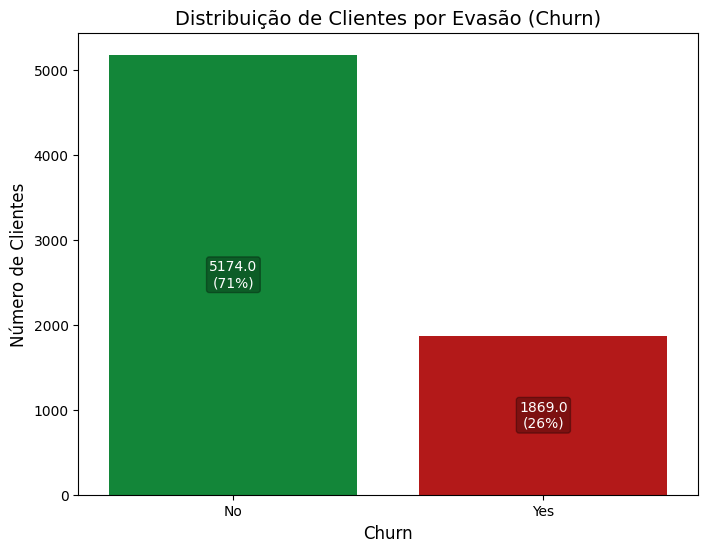


➡️ Proporção de Churn (após remoção dos valores vazios):

Churn
No     71.0
Yes    26.0
        3.0
Name: proportion, dtype: float64


In [60]:
# Verifica a distribuição da variável alvo 'Churn' no DataFrame limpo
# Usa o dataframe "df_flat"
churn_counts = df_flat['Churn'].value_counts() # Corrected: Use df_flat

print("➡️ Distribuição da variável alvo 'Churn' (após remoção dos valores vazios):")
print()
print(churn_counts)

# Visualiza a distribuição usando um gráfico de barras com cores e contagens específicas
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df_flat, palette={'No': '#009933', 'Yes': '#cc0000'}, order=['No', 'Yes']) # Corrected: Use df_flat
plt.title('Distribuição de Clientes por Evasão (Churn)', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Adiciona contagens exatas e porcentagens (arredondadas para inteiro) dentro de cada barra
total = len(df_flat) # Corrected: Use df_flat for total length
for p in ax.patches:
    height = p.get_height()
    # Calculate percentage and round to nearest integer
    percentage = (height / total) * 100
    annotation_text = f'{height}\n({percentage:.0f}%)' # Format percentage to 0 decimal places

    # Position the text in the middle of the bar. Adjusting xytext slightly.
    ax.annotate(annotation_text, (p.get_x() + p.get_width() / 2., height * 0.5), # Position at 50% of bar height
                ha='center', va='center', # Horizontal and vertical alignment to center the text
                fontsize=10, color='white', # Use white color for better visibility on colored bars
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.3)) # Add a small background box for better readability


plt.show()

# Exibir a proporção em porcentagem no DataFrame limpo
churn_proportion = df_flat['Churn'].value_counts(normalize=True) * 100 # Corrected: Use df_flat
print("\n➡️ Proporção de Churn (após remoção dos valores vazios):")
print()
print(churn_proportion.round(0)) # Display proportions rounded to 0 decimal places

### Análise de Features Numéricas
> Objetivo:
>> Explorando a distribuição das features numéricas e sua relação com a variável alvo 'Churn'.

➡️ Colunas numéricas para análise: ['tenure', 'Charges.Monthly', 'Charges.Total']



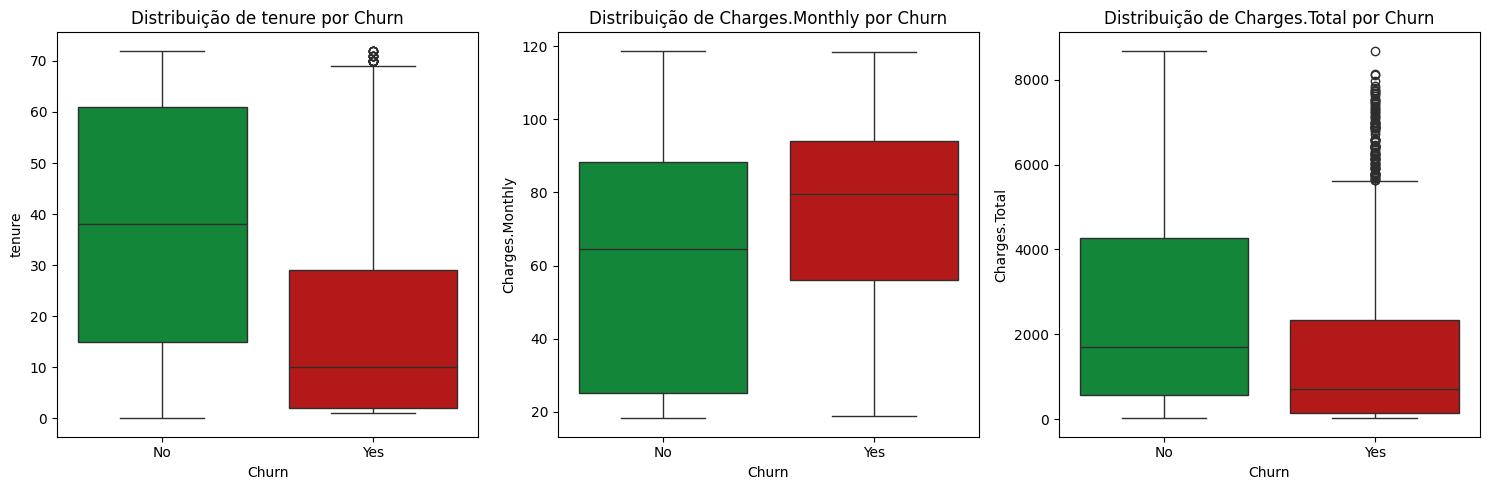

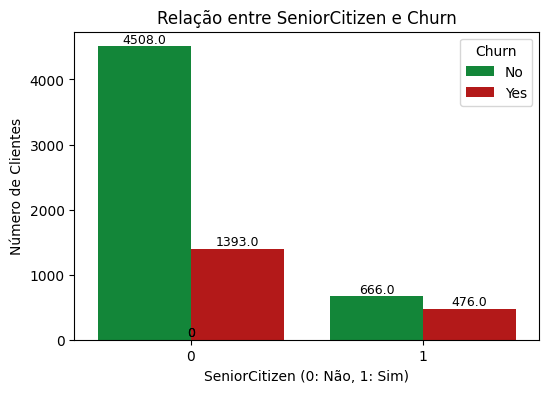

In [61]:
# Identificar colunas numéricas
# Baseado na análise anterior, as colunas numéricas são: 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'
# Embora 'SeniorCitizen' seja numérica (0 ou 1), pode ser interessante tratá-la como categórica em algumas análises, mas aqui será incluída como numérica para verificar as  distribuições.
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total'] # Excluindo SeniorCitizen para plots de distribuição contínua/quase contínua

print(f"➡️ Colunas numéricas para análise: {numerical_cols}")
print()

# Visualizar a distribuição das features numéricas usando histogramas ou boxplots
# Usar boxplots para visualizar a distribuição de cada feature numérica em relação ao Churn
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calcular o número de linhas necessário

plt.figure(figsize=(15, n_rows * 5))

# Define a paleta de cores para os boxplots
churn_palette = {'No': '#009933', 'Yes': '#cc0000'}

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Usa o DataFrame limpo (df_flat) e a paleta de cores especificada
    sns.boxplot(x='Churn', y=col, data=df_flat, palette=churn_palette, order=['No', 'Yes'])
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
print()



# Estratégia para visualização da variável 'SeniorCitizen' = um countplot como uma feature categórica
plt.figure(figsize=(6, 4))
# Usa o DataFrame limpo (df_flat) e a paleta de cores especificada
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_flat, palette=churn_palette, order=[0, 1], hue_order=['No', 'Yes'])
plt.title('Relação entre SeniorCitizen e Churn')
plt.xlabel('SeniorCitizen (0: Não, 1: Sim)')
plt.ylabel('Número de Clientes')

# Adicionar contagens exatas acima de cada barra (opcional, mas útil)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

plt.show()

### Distribuição de Features Numéricas (Histogramas)
> Objetivo:
>>Visualizar a distribuição de frequência das features numéricas 'tenure', 'Charges.Monthly' e 'Charges.Total' usando histogramas para entender a forma, o centro e a dispersão dos dados em cada uma dessas colunas.

➡️ Gerando histogramas para as colunas: ['tenure', 'Charges.Monthly', 'Charges.Total']



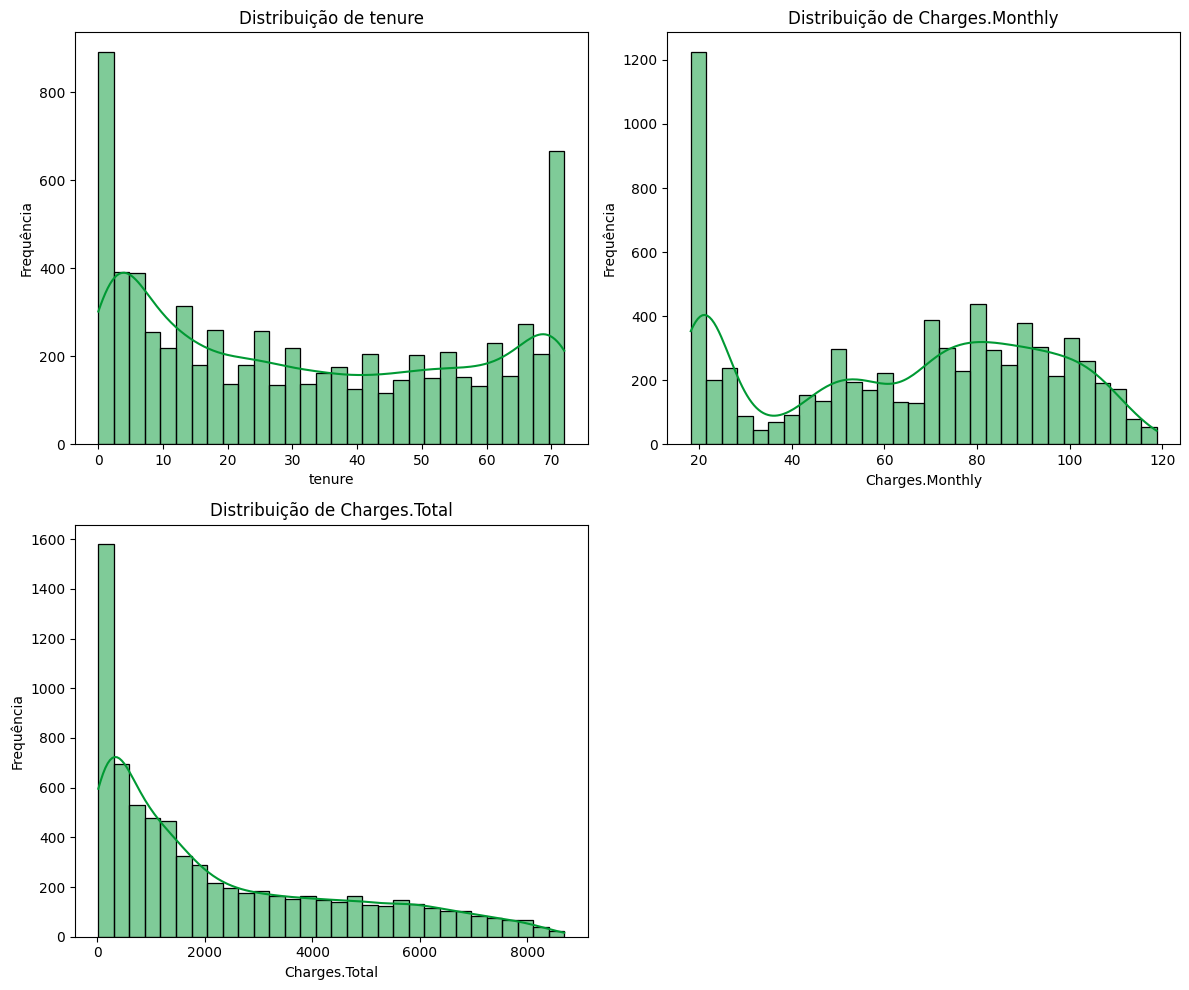

In [62]:
# Identificar colunas numéricas para histogramas
# Usaremos as colunas numéricas que já foram identificadas ('tenure', 'Charges.Monthly', 'Charges.Total')
# Corrigindo para usar os nomes originais das colunas presentes em df_flat
numerical_cols_hist = ['tenure', 'Charges.Monthly', 'Charges.Total']

print(f"➡️ Gerando histogramas para as colunas: {numerical_cols_hist}")
print()

# Visualizar a distribuição das features numéricas usando histogramas
n_cols = 2 # Número de colunas para subplots
n_rows = (len(numerical_cols_hist) + n_cols - 1) // n_cols # Calcular o número de linhas necessário

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(numerical_cols_hist):
    plt.subplot(n_rows, n_cols, i + 1)
    # Usa o DataFrame limpo (df_flat) e os nomes originais das colunas
    sns.histplot(data=df_flat, x=col, kde=True, color='#009933', bins=30) # Adiciona KDE para suavizar a distribuição
    plt.title(f'Distribuição de {col}') # Mantém o nome original no título ou pode traduzir aqui se preferir
    plt.xlabel(col) # Mantém o nome original no eixo ou pode traduzir aqui se preferir
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Análise de Features Categóricas
> Objetivo: <br>
>> Explorar a relação entre as features categóricas e a variável alvo 'Churn'.

>> Identifica colunas categóricas (excluindo 'Churn' que já foi analisada e 'customerID' que foi removida) , a partir do DataFrame limpo `final_df_cleaned` para detectar as colunas categóricas.

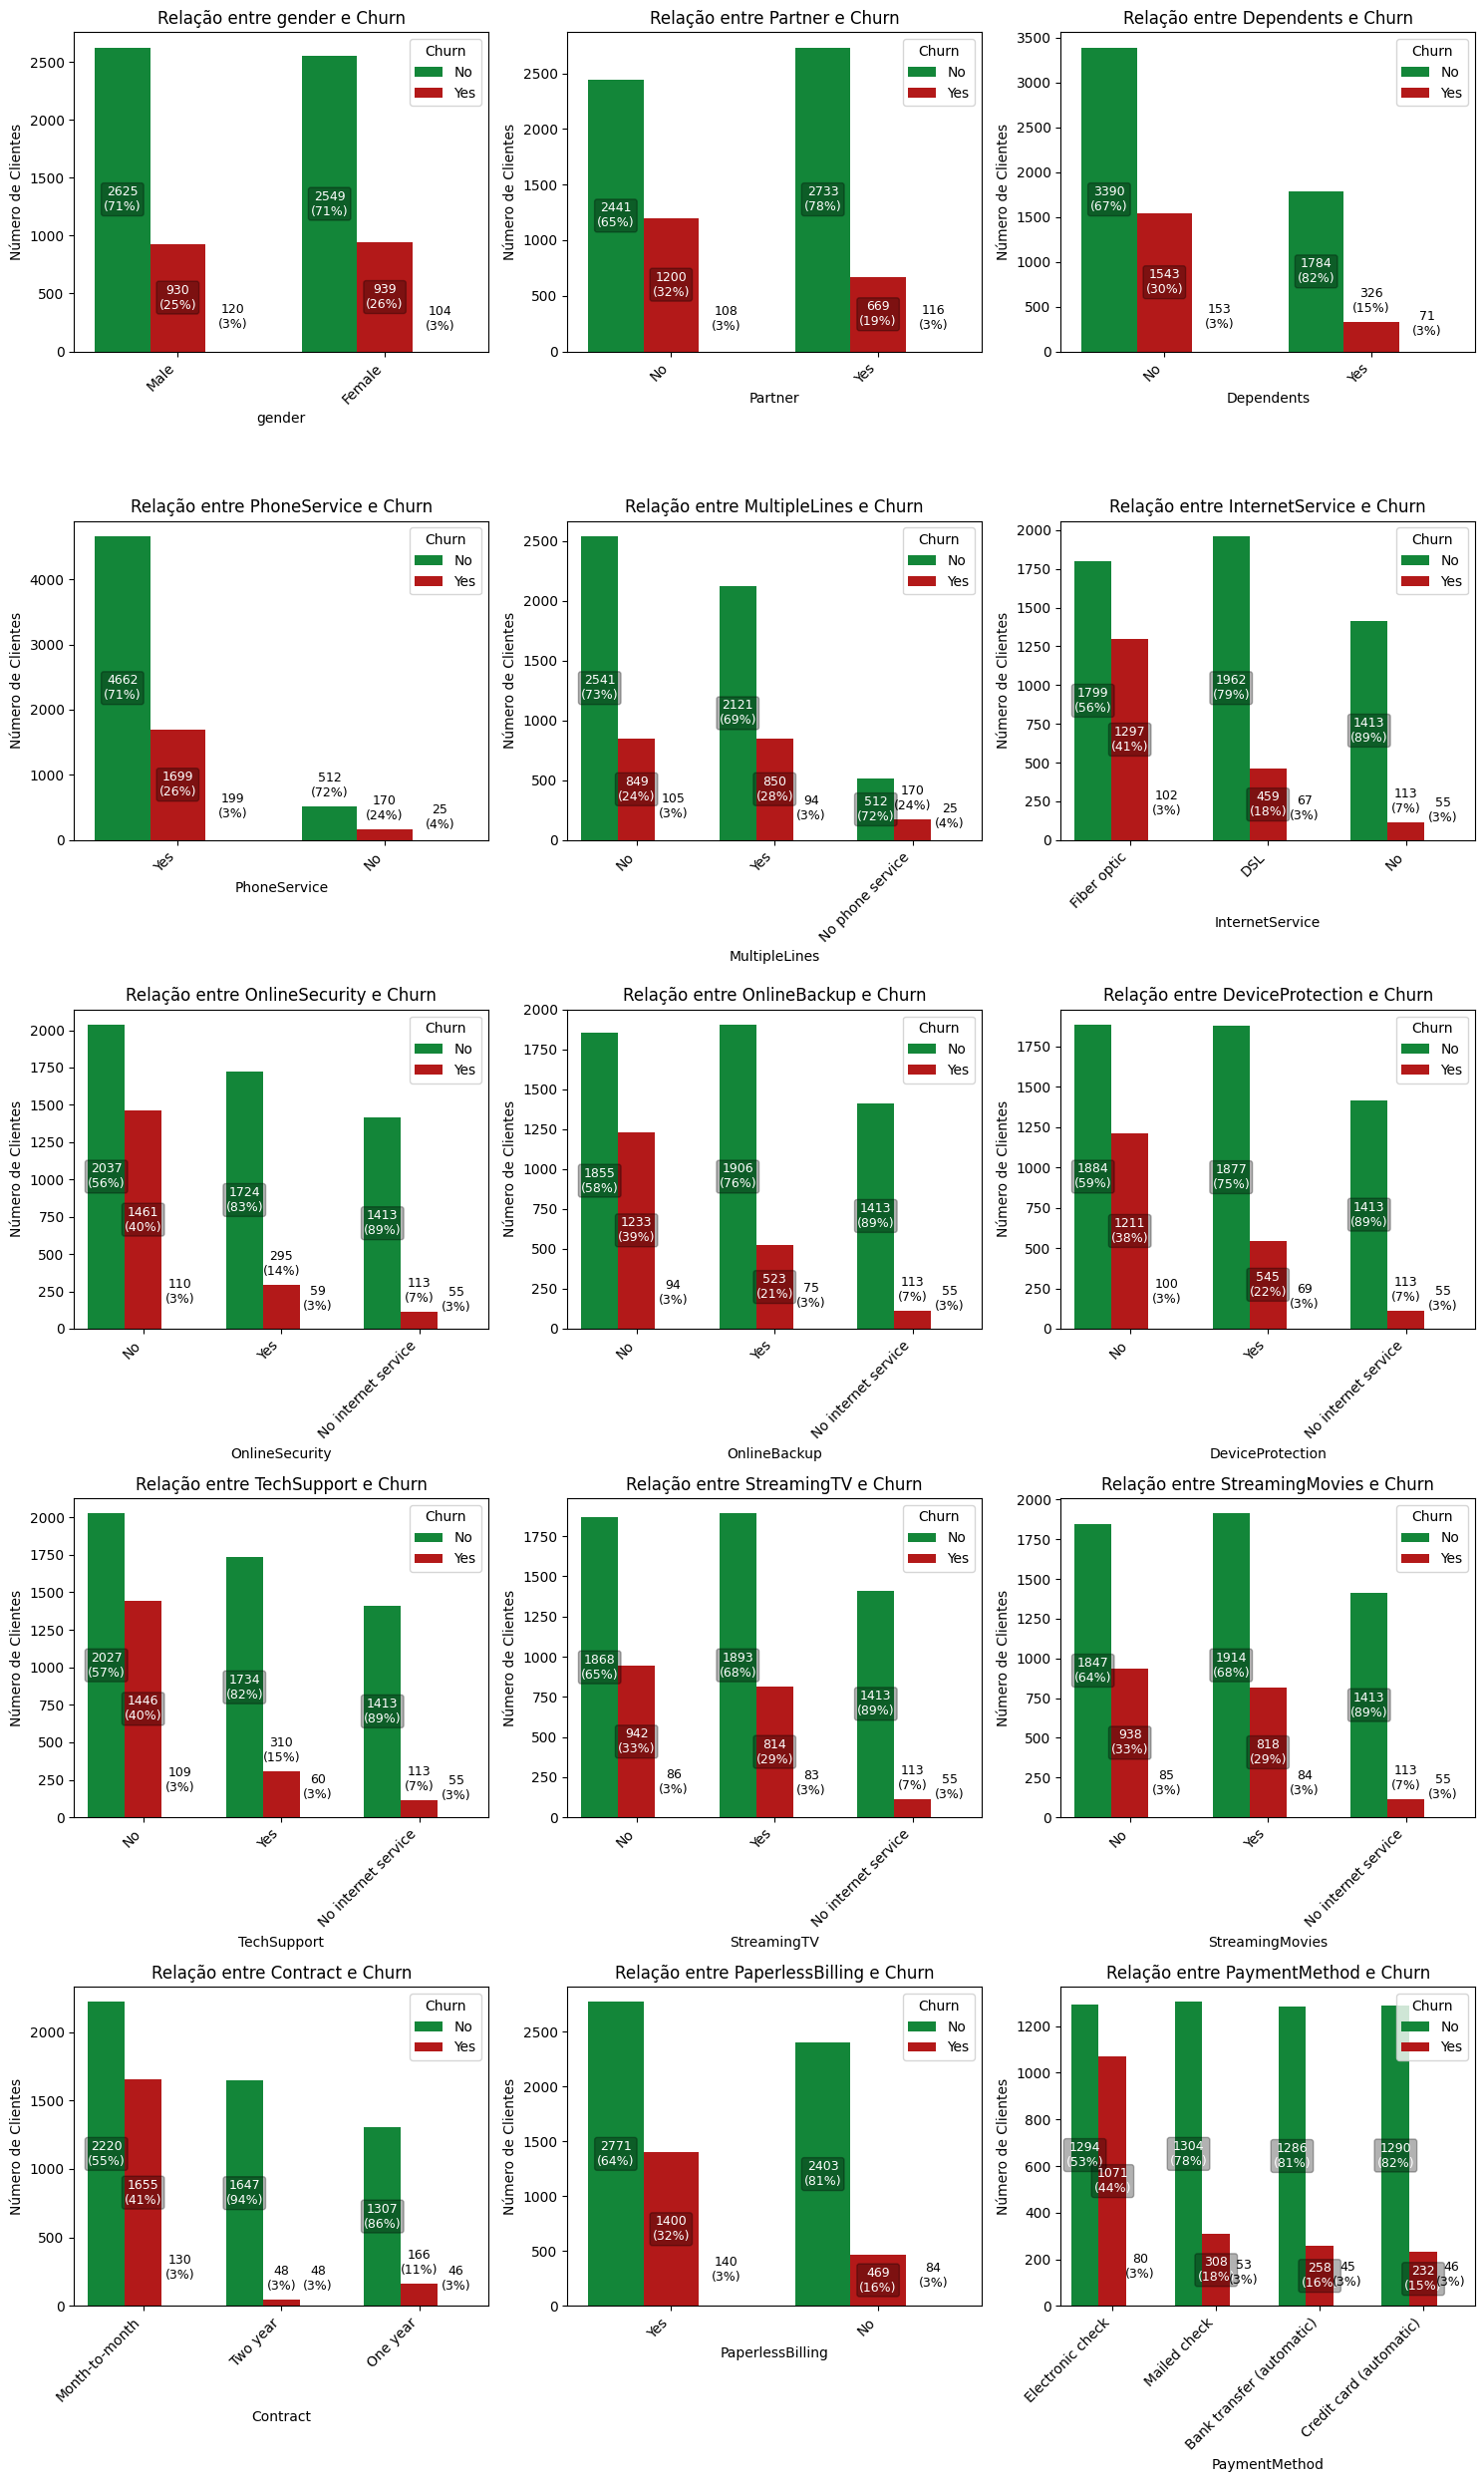

In [63]:
# Identifica colunas categóricas (excluindo 'Churn' que já foi analisada e 'customerID' que foi removida) no DataFrame `df_flat`.
categorical_cols = df_flat.select_dtypes(include='object').columns.tolist()
# Remove 'Churn' da lista de colunas categóricas a serem analisadas como features
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# print(f"Colunas categóricas para análise: {categorical_cols}") # Suprimindo este print

# Define a paleta de cores para os gráficos de Churn
churn_palette = {'No': '#009933', 'Yes': '#cc0000'}

# Visualiza a relação entre features categóricas e Churn
n_cols = 3 # Número de colunas para subplots
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols # Calcula o número de linhas necessário para os subplots

plt.figure(figsize=(15, n_rows * 5))

# Itera sobre cada coluna categórica
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Calcule as contagens e percentuais por categoria e Churn
    # Agrupa o DataFrame pela coluna atual e 'Churn', e conta o número de ocorrências
    grouped_counts = df_flat.groupby([col, 'Churn']).size().unstack(fill_value=0)

    # Calcula o total de clientes em cada categoria da coluna atual
    total_in_category = grouped_counts.sum(axis=1)

    # Calcula as porcentagens de Churn e Não-Churn dentro de cada categoria
    # Usa .reindex para garantir que todas as categorias estejam presentes, mesmo que tenham 0 em um dos grupos de Churn
    grouped_percentages = grouped_counts.divide(total_in_category, axis=0) * 100


    # Cria o gráfico de barras (countplot)
    # Usa o DataFrame `df_flat`, define o eixo x, o hue (variável alvo), a paleta de cores e a ordem das barras
    ax = sns.countplot(x=col, hue='Churn', data=df_flat, palette=churn_palette, order=df_flat[col].value_counts().index)

    # Define o título e os rótulos dos eixos
    plt.title(f'Relação entre {col} e Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    # Rotaciona os rótulos do eixo x para melhor legibilidade se forem longos
    plt.xticks(rotation=45, ha='right')
    # Adiciona a legenda para o hue (Churn)
    plt.legend(title='Churn')

    # --- Lógica de Anotação Aprimorada ---
    # Mapeia os rótulos dos contêineres (gerados pelo seaborn para o hue) para os valores reais do hue ('No', 'Yes')
    # Obtém os textos da legenda, que devem corresponder aos valores do hue
    legend_texts = [text.get_text() for text in ax.legend_.get_texts()]
    # Cria um dicionário mapeando o label do contêiner (ex: '_container0') para o valor do hue (ex: 'No')
    # Certifica-se de que os rótulos da legenda correspondem aos contêineres
    container_to_hue = {}
    for container in ax.containers:
        label = container.get_label()
        # Encontra o texto da legenda que corresponde a este contêiner (pode ser pelo índice ou por correspondência de label se possível)
        try:
            # Tenta encontrar o texto da legenda que corresponde ao label do contêiner
            # Isso pode variar dependendo da versão do seaborn e como os labels são gerados
            # Uma abordagem mais segura é usar o índice se a ordem dos contêineres for consistente com a ordem da legenda
            # Assumindo que a ordem dos contêineres corresponde à ordem dos hue_order no countplot ('No', 'Yes')
            container_index = ax.containers.index(container)
            hue_value = legend_texts[container_index]
            container_to_hue[label] = hue_value
        except (ValueError, IndexError):
            # Fallback ou tratamento de erro se o mapeamento falhar
            # print(f"Warning: Could not map container label '{label}' to a hue value in column '{col}'.") # Suprimindo este print
            container_to_hue[label] = 'Unknown_Hue' # Atribui um valor desconhecido


    # Itera sobre cada contêiner de barras (um para cada valor de hue, 'No' e 'Yes')
    for container in ax.containers:
        # Obtém a categoria do hue ('No' ou 'Yes') usando o mapeamento
        hue_category = container_to_hue.get(container.get_label(), 'Unknown_Hue')

        # Itera sobre cada "patch" (barra individual) no contêiner atual
        for patch in container.patches:
            height = patch.get_height() # Altura da barra (contagem de clientes)
            # Obtém o centro x da barra
            x_center = patch.get_x() + patch.get_width() / 2.

            # Encontra o rótulo da categoria no eixo x que corresponde à posição x da barra
            # Obtém as posições e rótulos dos ticks do eixo x
            x_ticks = ax.get_xticks()
            x_labels = [t.get_text() for t in ax.get_xticklabels()]
            # Encontra o índice do tick do eixo x mais próximo do centro da barra
            closest_tick_index = np.argmin(np.abs(x_ticks - x_center))
            category_value = x_labels[closest_tick_index]

            # Adiciona a anotação apenas se a altura da barra for maior que 0
            if height > 0:
                # Tenta encontrar a contagem correspondente nos dados agrupados
                try:
                    count = grouped_counts.loc[category_value, hue_category]
                except KeyError:
                    count = height # Fallback para a altura da barra se não encontrar nos dados agrupados
                    # print(f"KeyError fetching count for {col}, {category_value}, {hue_category}. Using patch height.") # Suprimindo este print
                except Exception as e:
                    count = height
                    # print(f"Error fetching count for {col}, {category_value}, {hue_category}: {e}. Using patch height.") # Suprimindo este print


                # Tenta encontrar a porcentagem correspondente no DataFrame pre-calculado
                try:
                    percentage = grouped_percentages.loc[category_value, hue_category]
                    # Formata o texto da anotação com a contagem e a porcentagem (arredondada para 0 casas decimais)
                    annotation_text = f'{int(count)}\n({percentage:.0f}%)' # Converte count para int
                except KeyError:
                    # Fallback caso a combinação category_value/hue_category não seja encontrada nos percentuais agrupados
                    # Tenta calcular a porcentagem manualmente se o total da categoria for > 0
                    total_for_category = total_in_category.get(category_value, 0)
                    manual_percentage = (count / total_for_category) * 100 if total_for_category > 0 else 0.0
                    annotation_text = f'{int(count)}\n({manual_percentage:.0f}%)' # Converte count para int
                    # print(f"KeyError calculating percentage for {col}, {category_value}, {hue_category}. Manual calculation.") # Suprimindo este print
                except Exception as e:
                     # Captura outros possíveis erros na busca por anotação
                     annotation_text = f'{int(count)}\n(Error%)' # Converte count para int
                     # print(f"Error calculating percentage for {col}, {category_value}, {hue_category}: {e}.") # Suprimindo este print


                # Ajusta a posição da anotação: dentro para barras maiores, acima para barras menores
                # Define um limite de altura da barra para decidir a posição da anotação
                # Ajusta o limite para ser um pouco menor para aumentar a chance de anotação dentro
                height_threshold = max(ax.get_ylim()) * 0.08 # Exemplo de limite: 8% do limite máximo do eixo y
                if height > height_threshold * 2: # Se a barra for alta o suficiente, posiciona dentro
                     # Posição no centro da altura da barra
                     ax.annotate(annotation_text, (x_center, height / 2.),
                                 ha='center', va='center', fontsize=9, color='white', # Texto branco para visibilidade em barras escuras
                                 bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.3)) # Caixa de fundo para melhor leitura
                else: # Se a barra for muito curta, posiciona acima
                     ax.annotate(annotation_text, (x_center, height),
                                 ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=9, color='black') # Texto preto para anotações acima das barras


# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()
# Exibe os gráficos
plt.show()

### Análise de Features Numéricas

Vamos explorar a distribuição das features numéricas e sua relação com a variável alvo 'Churn'.

Colunas numéricas para análise: ['tenure', 'Charges.Monthly', 'Charges.Total']


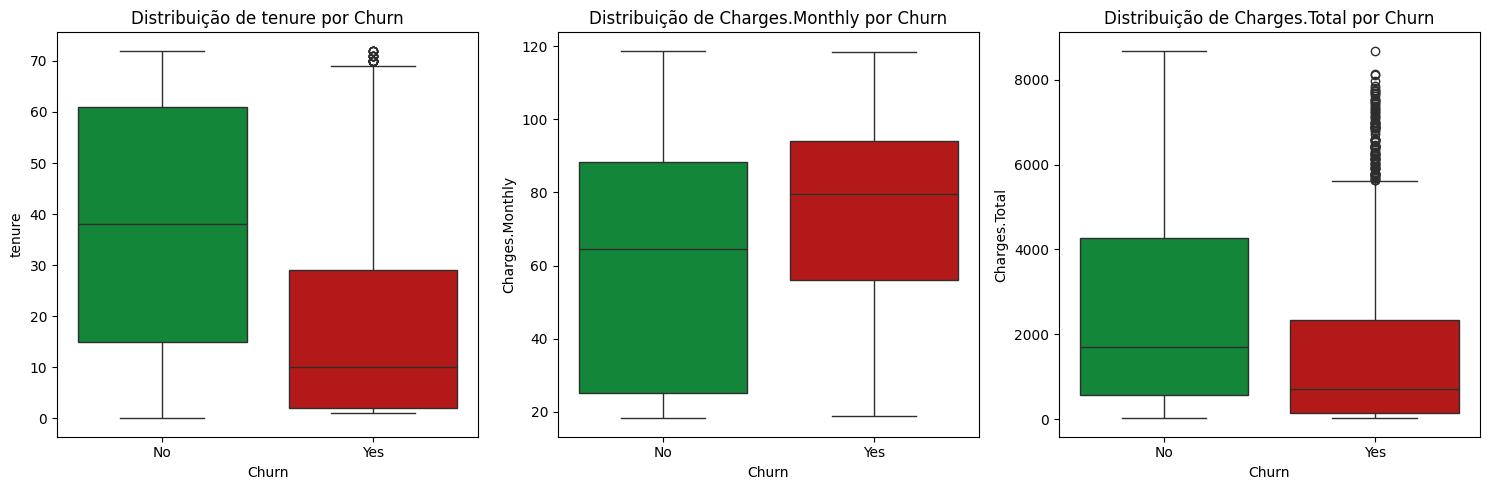

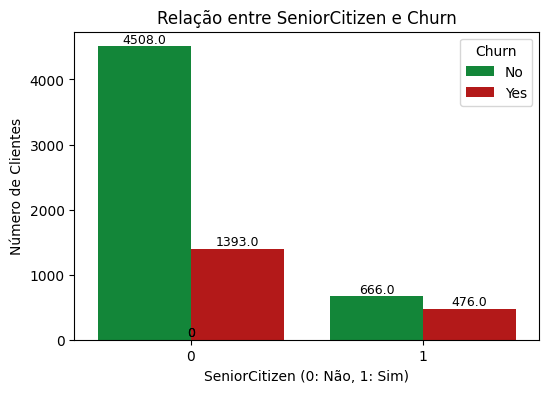

In [64]:
# Identificar colunas numéricas
# Baseado na análise anterior, as colunas numéricas são: 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'
# Embora 'SeniorCitizen' seja numérica (0 ou 1), pode ser interessante tratá-la como categórica em algumas análises, mas aqui vamos incluí-la como numérica para ver distribuições.
# Corrigindo os nomes das colunas para os nomes originais em df_flat
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total'] # Excluindo SeniorCitizen para plots de distribuição contínua/quase contínua

print(f"Colunas numéricas para análise: {numerical_cols}")

# Visualizar a distribuição das features numéricas usando histogramas ou boxplots
# Usaremos boxplots para visualizar a distribuição de cada feature numérica em relação ao Churn
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calcular o número de linhas necessário

plt.figure(figsize=(15, n_rows * 5))

# Define a paleta de cores para os boxplots
churn_palette = {'No': '#009933', 'Yes': '#cc0000'}

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Usa o DataFrame limpo (df_flat) e a paleta de cores especificada
    sns.boxplot(x='Churn', y=col, data=df_flat, palette=churn_palette, order=['No', 'Yes'])
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
print()


# Para 'SeniorCitizen', podemos usar um countplot como uma feature categórica
plt.figure(figsize=(6, 4))
# Usa o DataFrame limpo (df_flat) e a paleta de cores especificada
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_flat, palette=churn_palette, order=[0, 1], hue_order=['No', 'Yes'])
plt.title('Relação entre SeniorCitizen e Churn')
plt.xlabel('SeniorCitizen (0: Não, 1: Sim)')
plt.ylabel('Número de Clientes')

# Adicionar contagens exatas acima de cada barra (opcional, mas útil)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

plt.show()

## Fase 2: Análise Bivariada e Multivariada
>> (Relação entre Variáveis)

### Análise de Correlação



Matriz de Correlação das Features Numéricas:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
SeniorCitizen,1.000000,0.018187,0.220388,0.103484
tenure,0.018187,1.000000,0.247982,0.824034
Charges.Monthly,0.220388,0.247982,1.000000,0.651532
Charges.Total,0.103484,0.824034,0.651532,1.000000


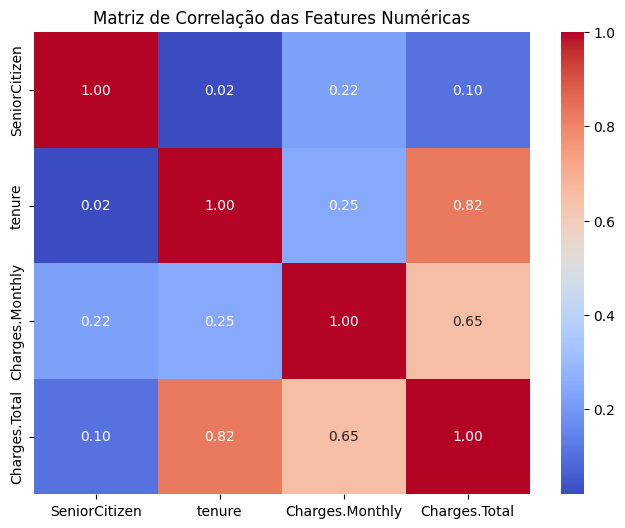

In [65]:
# Calcular a matriz de correlação para colunas numéricas
# Incluindo 'SeniorCitizen' nesta correlação numérica
# Usando os nomes das colunas originais presentes em df_flat
numerical_cols_corr = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']
correlation_matrix = df_flat[numerical_cols_corr].corr()

print("\nMatriz de Correlação das Features Numéricas:")
display(correlation_matrix)

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()

> Interpretação:
>> O código calcula e visualiza a matriz de correlação de Pearson para as colunas numéricas ('`SeniorCitizen`', '`tenure`', '`Charges.Monthly'`, '`Charges.Total`').

>> Matriz de Correlação: <br>
>> É uma tabela onde cada célula mostra o coeficiente de correlação entre duas features. A diagonal principal é sempre 1, pois uma feature é perfeitamente correlacionada consigo mesma. A matriz é simétrica (o coeficiente entre A e B é o mesmo que entre B e A).

>> *Heatmap*: <br>
>> É uma representação visual da matriz de correlação, onde a intensidade da cor em cada célula corresponde ao valor do coeficiente de correlação. Cores mais quentes (como vermelho) geralmente indicam correlação positiva mais forte, e cores mais frias (como azul) indicam correlação negativa mais forte. O centro (geralmente branco ou cinza) indica correlação próxima de zero.

> Qauanto aos Valores:

>> O coeficiente de correlação de Pearson varia de -1 a +1:

>> +1: Correlação positiva perfeita (quando uma feature aumenta, a outra aumenta proporcionalmente).

>> -1: Correlação negativa perfeita (quando uma feature aumenta, a outra diminui proporcionalmente).

>> 0: Nenhuma correlação linear (não há uma relação linear clara entre as duas features).
Valores entre 0 e 1 (ou 0 e -1): Indicam a força e a direção da correlação linear (quanto mais próximo de +1 ou -1, mais forte a correlação).

> Analisando o heatmap gerado:

>> Obseva-se valores como 0.82 entre *tenure *e *Charges.Total*. Isso indica uma forte correlação positiva. Sugerindo que clientes que ficam mais tempo (tenure) provavelmente acumulam um total de cobranças (Charges.Total) maior.

>> Nota-se valores como 0.65 entre Charges.Monthly e Charges.Total. Isso também é uma correlação positiva significativa, pois o total de cobranças é a soma das cobranças mensais ao longo do tempo.

>> As correlações entre *SeniorCitizen* e as outras features numéricas são mais baixas (0.02 com tenure, 0.22 com *Charges.Monthly*, 0.10 com *Charges.Total*), indicando uma relação linear fraca com essas variáveis.

### Análise de Features Criadas (Engenharia de Features):

> Visualizar e analisar o impacto das novas features (ex: tenure_group, HasMultipleServices) na taxa de Churn.


✅ Coluna 'HasMultipleServices' criada com sucesso.
✅ Coluna 'HasPremiumSecurity' criada com sucesso.
✅ Coluna 'HasStreaming' criada com sucesso.
✅ Coluna 'TotalExtraServices' criada com sucesso.

➡️ Primeiras linhas do DataFrame com as novas features de feature engineering:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,HasMultipleServices,HasPremiumSecurity,HasStreaming,TotalExtraServices
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,One year,Yes,Mailed check,65.6,593.30,True,False,True,3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,Yes,Month-to-month,No,Mailed check,59.9,542.40,True,False,True,1
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,73.9,280.85,True,False,False,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,True,False,True,4
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,83.9,267.40,True,False,True,2



➡️ Distribuição das novas features em relação a Churn:

Distribuição de HasMultipleServices por Churn:


Churn,,No,Yes
HasMultipleServices,,,
False,42,1126,138
True,182,4048,1731



Proporção de Churn por HasMultipleServices:


Churn,,No,Yes
HasMultipleServices,,,
False,3.2,86.2,10.6
True,3.1,67.9,29.0


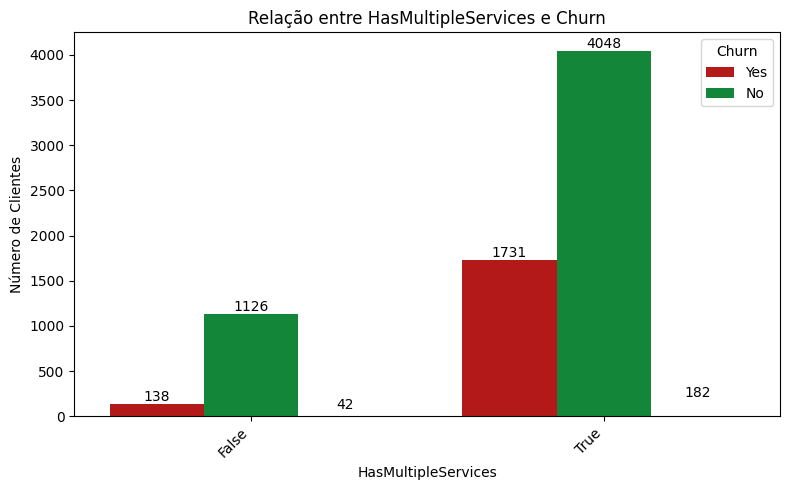


Distribuição de HasPremiumSecurity por Churn:


Churn,,No,Yes
HasPremiumSecurity,,,
False,191,4174,1770
True,33,1000,99



Proporção de Churn por HasPremiumSecurity:


Churn,,No,Yes
HasPremiumSecurity,,,
False,3.1,68.0,28.9
True,2.9,88.3,8.7


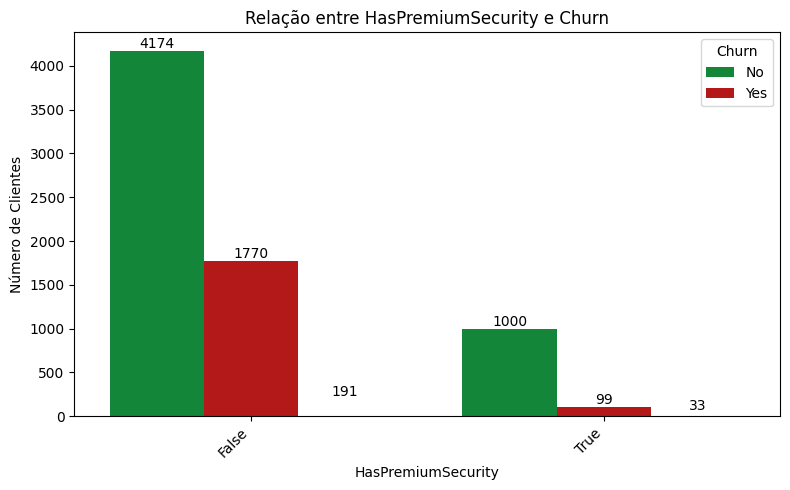


Distribuição de HasStreaming por Churn:


Churn,,No,Yes
HasStreaming,,,
False,113,2736,808
True,111,2438,1061



Proporção de Churn por HasStreaming:


Churn,,No,Yes
HasStreaming,,,
False,3.1,74.8,22.1
True,3.1,67.5,29.4


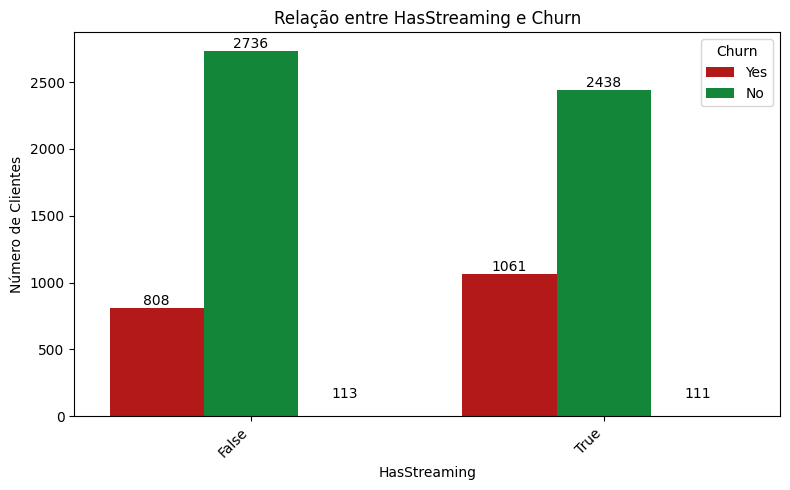


Distribuição de TotalExtraServices por Churn:


Churn,,No,Yes
TotalExtraServices,,,
0,83,1744,475
1,28,524,442
2,25,663,370
3,31,812,306
4,33,662,190
5,17,500,71
6,7,269,15



Proporção de Churn por TotalExtraServices:


Churn,,No,Yes
TotalExtraServices,,,
0,3.6,75.8,20.6
1,2.8,52.7,44.5
2,2.4,62.7,35.0
3,2.7,70.7,26.6
4,3.7,74.8,21.5
5,2.9,85.0,12.1
6,2.4,92.4,5.2


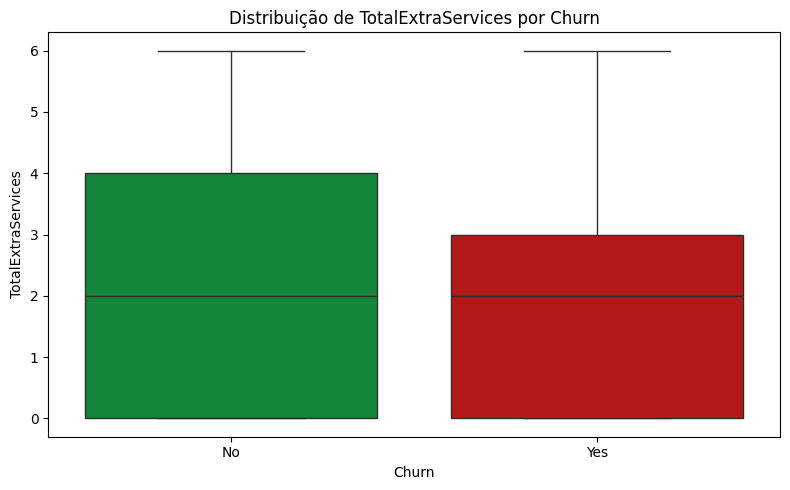


Etapa de Engenharia de Features concluída.


In [66]:
import pandas as pd
import numpy as np

# Use the cleaned DataFrame (df_flat) for feature engineering

# 1. Skip creation of 'tenure_group' using pd.cut for now.
# We will rely on the original numerical 'tenure' column.
# If binning is needed later, it can be done after encoding or as part of modeling.
if 'tenure_group' in df_flat.columns:
    # Remove the column if it exists from a previous run
    df_flat = df_flat.drop(columns=['tenure_group'])
    print("⚠️ Coluna 'tenure_group' removida para simplificar o pipeline.")

# 2. Create 'HasMultipleServices'
# Define list of service columns (using original English names)
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Filter for columns that actually exist in the DataFrame
existing_service_cols = [col for col in service_cols if col in df_flat.columns]

if existing_service_cols:
    # Count the number of services where the value indicates the service is active
    # 'Yes' is active for most services, 'DSL' or 'Fiber optic' for InternetService
    active_service_values = ['Yes', 'DSL', 'Fiber optic']

    # Apply the logic row-wise to count active services
    df_flat['NumActiveServices'] = df_flat[existing_service_cols].apply(
        lambda row: sum(1 for col in existing_service_cols if row[col] in active_service_values),
        axis=1
    )
    # Create 'HasMultipleServices': True if NumActiveServices > 1
    df_flat['HasMultipleServices'] = df_flat['NumActiveServices'] > 1

    print("✅ Coluna 'HasMultipleServices' criada com sucesso.")
else:
     print("⚠️ Aviso: Nenhuma coluna de serviço encontrada em df_flat para criar 'HasMultipleServices'.")


# 3. Create 'HasPremiumSecurity'
# Define the premium security columns (using original English names)
premium_security_cols = ['OnlineSecurity', 'TechSupport']
# Filter for columns that actually exist in the DataFrame
existing_premium_security_cols = [col for col in premium_security_cols if col in df_flat.columns]

if len(existing_premium_security_cols) == 2:
    # True if both 'OnlineSecurity' and 'TechSupport' are 'Yes'
    df_flat['HasPremiumSecurity'] = (df_flat['OnlineSecurity'] == 'Yes') & (df_flat['TechSupport'] == 'Yes')
    print("✅ Coluna 'HasPremiumSecurity' criada com sucesso.")
elif existing_premium_security_cols:
    print(f"⚠️ Aviso: Apenas algumas colunas de segurança premium ({existing_premium_security_cols}) encontradas em df_flat. Não foi possível criar 'HasPremiumSecurity' como definido (requer 'OnlineSecurity' e 'TechSupport').")
else:
    print("⚠️ Aviso: Nenhuma coluna de segurança premium ('OnlineSecurity', 'TechSupport') encontrada em df_flat para criar 'HasPremiumSecurity'.")


# 4. Create 'HasStreaming'
# Define the streaming columns (using original English names)
streaming_cols = ['StreamingTV', 'StreamingMovies']
# Filter for columns that actually exist in the DataFrame
existing_streaming_cols = [col for col in streaming_cols if col in df_flat.columns]

if existing_streaming_cols:
    # True if either 'StreamingTV' or 'StreamingMovies' is 'Yes'
    # Use .any(axis=1) to check if 'Yes' is present in any of the specified columns for each row
    df_flat['HasStreaming'] = (df_flat[existing_streaming_cols] == 'Yes').any(axis=1)
    print("✅ Coluna 'HasStreaming' criada com sucesso.")
else:
    print("⚠️ Aviso: Nenhuma coluna de streaming ('StreamingTV', 'StreamingMovies') encontrada em df_flat para criar 'HasStreaming'.")

# 5. Create 'TotalExtraServices'
# Define the extra service columns (using original English names)
extra_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Filter for columns that actually exist in the DataFrame
existing_extra_service_cols = [col for col in extra_service_cols if col in df_flat.columns]

if existing_extra_service_cols:
    # Count the number of 'Yes' values in the extra service columns for each row
    df_flat['TotalExtraServices'] = (df_flat[existing_extra_service_cols] == 'Yes').sum(axis=1)
    print("✅ Coluna 'TotalExtraServices' criada com sucesso.")
else:
    print("⚠️ Aviso: Nenhuma coluna de serviço extra ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') encontrada em df_flat para criar 'TotalExtraServices'.")


# Remove the intermediate 'NumActiveServices' column if it was created
if 'NumActiveServices' in df_flat.columns:
    df_flat = df_flat.drop(columns=['NumActiveServices'])


# 6. Display the first few rows of the DataFrame with the new columns
print("\n➡️ Primeiras linhas do DataFrame com as novas features de feature engineering:")
display(df_flat.head())

# 7. Verify the distribution of new categorical/boolean features in relation to Churn
print("\n➡️ Distribuição das novas features em relação a Churn:")

# Define the new categorical/boolean features to check
# Exclude 'tenure_group' as it's no longer created here
new_features_to_check = ['HasMultipleServices', 'HasPremiumSecurity', 'HasStreaming', 'TotalExtraServices']
# Filter for features that were successfully created
existing_new_features = [col for col in new_features_to_check if col in df_flat.columns]


# Define the palette for Churn status for visualization
churn_palette_check = {'No': '#009933', 'Yes': '#cc0000'} # Use the defined palette

for col in existing_new_features:
    print(f"\nDistribuição de {col} por Churn:")
    # Calculate and display value counts
    display(df_flat.groupby([col, 'Churn']).size().unstack(fill_value=0))

    # Calculate and display normalized value counts (proportions)
    print(f"\nProporção de Churn por {col}:")
    display(df_flat.groupby([col, 'Churn']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1).mul(100).round(1))

    # Opcionalmente visualizar usando countplots for categorical/boolean features
    # Plot countplots for boolean features
    if col in ['HasMultipleServices', 'HasPremiumSecurity', 'HasStreaming']:
        plt.figure(figsize=(8, 5))
        # Ensure order is correct for boolean features
        order = [False, True] if df_flat[col].dtype == 'bool' else sorted(df_flat[col].unique())
        # Handle potential NaN if any were introduced unexpectedly
        order = [x for x in order if pd.notna(x)]

        ax = sns.countplot(x=col, hue='Churn', data=df_flat, palette=churn_palette_check, order=order)
        plt.title(f'Relação entre {col} e Churn')
        plt.xlabel(col)
        plt.ylabel('Número de Clientes')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Churn')

        # Add annotations (counts)
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()
        plt.show()
    elif col == 'TotalExtraServices':
         # For TotalExtraServices, a boxplot or violin plot might be more suitable
         plt.figure(figsize=(8, 5))
         sns.boxplot(x='Churn', y=col, data=df_flat, palette=churn_palette_check, order=['No', 'Yes'])
         plt.title(f'Distribuição de {col} por Churn')
         plt.xlabel('Churn')
         plt.ylabel(col)
         plt.tight_layout()
         plt.show()


print("\nEtapa de Engenharia de Features concluída.")

> Interpretação <br>
>> O que o código Importa modelos - três algoritmos de classificação da biblioteca scikit-learn: <br>
LogisticRegression, DecisionTreeClassifier e RandomForestClassifier.<br>

>> Instancia os modelos: Cria uma instância de cada um desses modelos. O parâmetro random_state=42 é usado para garantir que os resultados sejam reproduzíveis (se o código for executado novamente com o mesmo random_state, os resultados do treinamento serão os mesmos).

>> Treina os modelos: Utiliza o método .fit() para treinar cada modelo. O treinamento é realizado nos dados de treino (X_train e y_train), que foram previamente balanceados e padronizados/normalizados. Durante o treinamento, cada algoritmo aprende os padrões nos dados de treino para fazer previsões sobre a variável alvo ('Churn').

> As mensagens no output:

>> Training Logistic Regression model...
>> Logistic Regression model trained.
>> Training Decision Tree model...
>> Decision Tree model trained.
>> Training Random Forest model...
>> Random Forest model trained.

>> São mensagens de texto impressas pelo código informando que o processo de treinamento de cada modelo foi iniciado (Training...) e concluído (...model trained.). Elas servem como um indicador visual do progresso da execução da célula.

### Análise de Interações entre Features:

 Explorar a relação combinada de duas ou mais variáveis com o Churn (ex: Tipo de Serviço de Internet vs. Tipo de Contrato).

## Fase 3: Aprofundamento e Análises Adicionais

### Identificação e Análise de Outliers em Features Numéricas
**Objetivo:** Identificar valores extremos (outliers) nas features numéricas do dataset e analisar sua relação com a variável alvo Churn.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar colunas numéricas no DataFrame limpo (df_flat)
# Excluindo 'SeniorCitizen' pois é binária (0 ou 1) e não faz sentido buscar outliers nela
numerical_cols_outliers = ['tenure', 'Charges.Monthly', 'Charges.Total']

print("➡️ Identificando e Analisando Outliers nas features numéricas:")

# Paleta de cores para Churn
churn_palette_outliers = {'No': '#009933', 'Yes': '#cc0000'}

# Iterar sobre as colunas numéricas para identificar e analisar outliers
for col in numerical_cols_outliers:
    print(f"\nAnálise de Outliers para a coluna: {col}")

    # Calcular Q1 (Primeiro Quartil), Q3 (Terceiro Quartil) e IQR (Intervalo Interquartil)
    Q1 = df_flat[col].quantile(0.25)
    Q3 = df_flat[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites para identificar outliers (usando 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df_flat[(df_flat[col] < lower_bound) | (df_flat[col] > upper_bound)].copy()
    non_outliers = df_flat[(df_flat[col] >= lower_bound) & (df_flat[col] <= upper_bound)].copy()

    print(f"  - Q1 ({col}): {Q1:.2f}")
    print(f"  - Q3 ({col}): {Q3:.2f}")
    print(f"  - IQR ({col}): {IQR:.2f}")
    print(f"  - Limite Inferior de Outlier: {lower_bound:.2f}")
    print(f"  - Limite Superior de Outlier: {upper_bound:.2f}")
    print(f"  - Número de Outliers identificados: {len(outliers)}")
    print(f"  - Proporção de Outliers: {(len(outliers) / len(df_flat)):.2%}")

    # Analisar a distribuição de Churn nos outliers vs não-outliers
    if not outliers.empty:
        print("\n  Distribuição de Churn em Outliers:")
        churn_counts_outliers = outliers['Churn'].value_counts()
        churn_prop_outliers = outliers['Churn'].value_counts(normalize=True) * 100
        display(pd.DataFrame({'Count': churn_counts_outliers, 'Proportion (%)': churn_prop_outliers}))

        # Comparar com a distribuição de Churn nos não-outliers
        print("\n  Distribuição de Churn em Não-Outliers:")
        churn_counts_non_outliers = non_outliers['Churn'].value_counts()
        churn_prop_non_outliers = non_outliers['Churn'].value_counts(normalize=True) * 100
        display(pd.DataFrame({'Count': churn_counts_non_outliers, 'Proportion (%)': churn_prop_non_outliers}))

        # Opcional: Visualizar a distribuição de Churn para outliers vs não-outliers
        plt.figure(figsize=(8, 5))
        sns.countplot(x='Churn', data=outliers, palette=churn_palette_outliers, order=['No', 'Yes'], label='Outliers')
        sns.countplot(x='Churn', data=non_outliers, palette=churn_palette_outliers, order=['No', 'Yes'], label='Não-Outliers', alpha=0.6) # Usar alpha para diferenciar
        plt.title(f'Distribuição de Churn em Outliers vs Não-Outliers para {col}')
        plt.xlabel('Churn')
        plt.ylabel('Número de Clientes')
        plt.legend()
        plt.show()

    else:
        print("\n  Nenhum outlier encontrado para analisar a distribuição de Churn.")


print("\nAnálise de Outliers concluída.")

➡️ Identificando e Analisando Outliers nas features numéricas:

Análise de Outliers para a coluna: tenure
  - Q1 (tenure): 9.00
  - Q3 (tenure): 55.00
  - IQR (tenure): 46.00
  - Limite Inferior de Outlier: -60.00
  - Limite Superior de Outlier: 124.00
  - Número de Outliers identificados: 0
  - Proporção de Outliers: 0.00%

  Nenhum outlier encontrado para analisar a distribuição de Churn.

Análise de Outliers para a coluna: Charges.Monthly
  - Q1 (Charges.Monthly): 35.42
  - Q3 (Charges.Monthly): 89.88
  - IQR (Charges.Monthly): 54.45
  - Limite Inferior de Outlier: -46.25
  - Limite Superior de Outlier: 171.55
  - Número de Outliers identificados: 0
  - Proporção de Outliers: 0.00%

  Nenhum outlier encontrado para analisar a distribuição de Churn.

Análise de Outliers para a coluna: Charges.Total
  - Q1 (Charges.Total): 401.40
  - Q3 (Charges.Total): 3778.52
  - IQR (Charges.Total): 3377.12
  - Limite Inferior de Outlier: -4664.29
  - Limite Superior de Outlier: 8844.21
  - Número 

### Exploração Aprofundada de Interações de Features
**Objetivo:** Investigar como a combinação de pares de features impacta a variável alvo Churn.

➡️ Explorando interações entre features:

Explorando interação entre 'Contract' e 'Charges.Monthly' em relação a Churn:


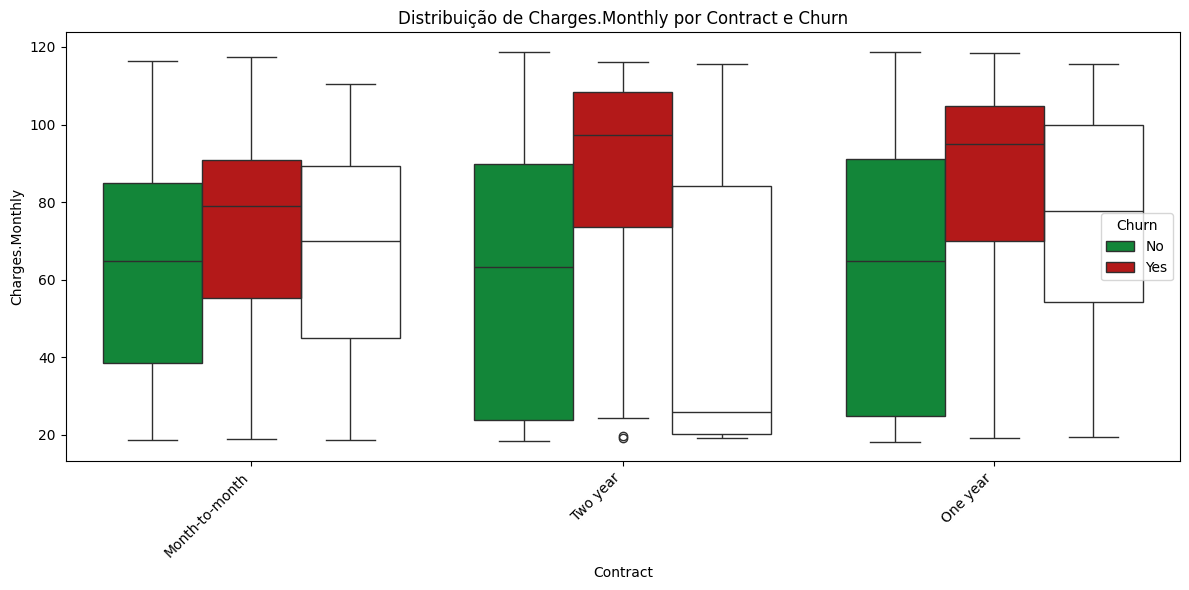


Explorando interação entre 'InternetService' e 'tenure' em relação a Churn:


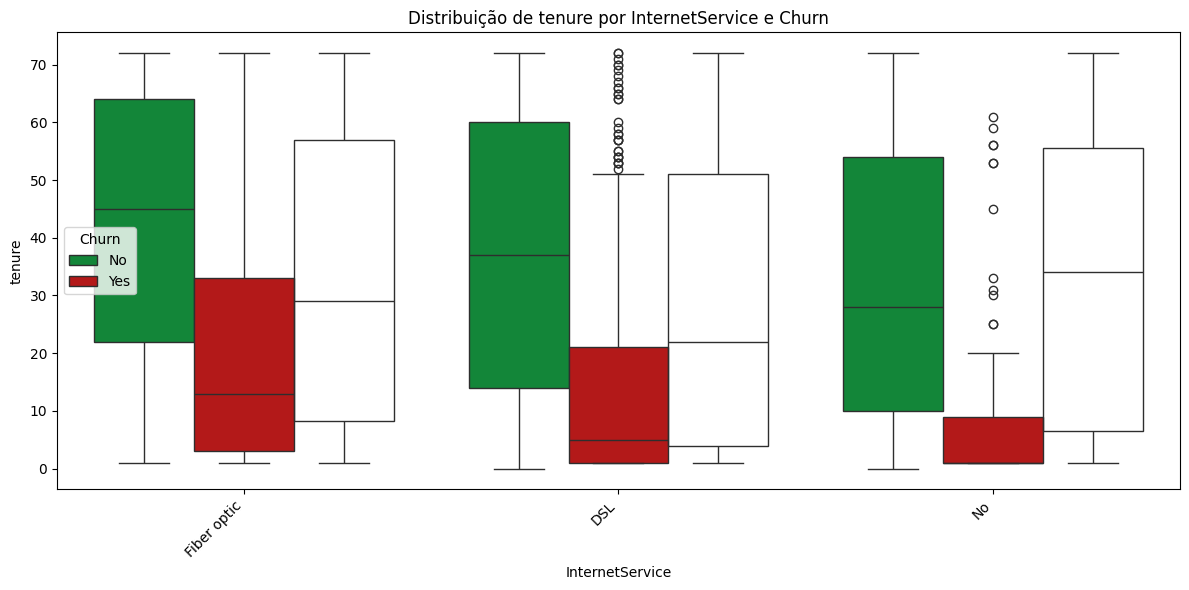


Explorando interação entre 'PaymentMethod' e 'tenure' em relação a Churn:


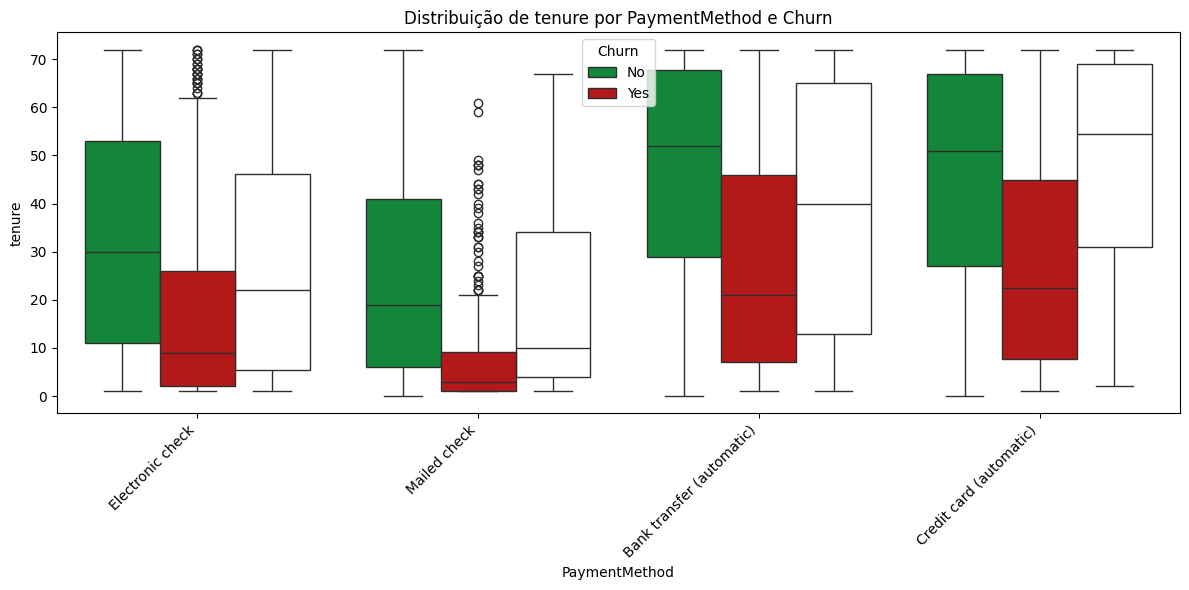


Explorando interação entre 'SeniorCitizen' e 'InternetService' em relação a Churn:


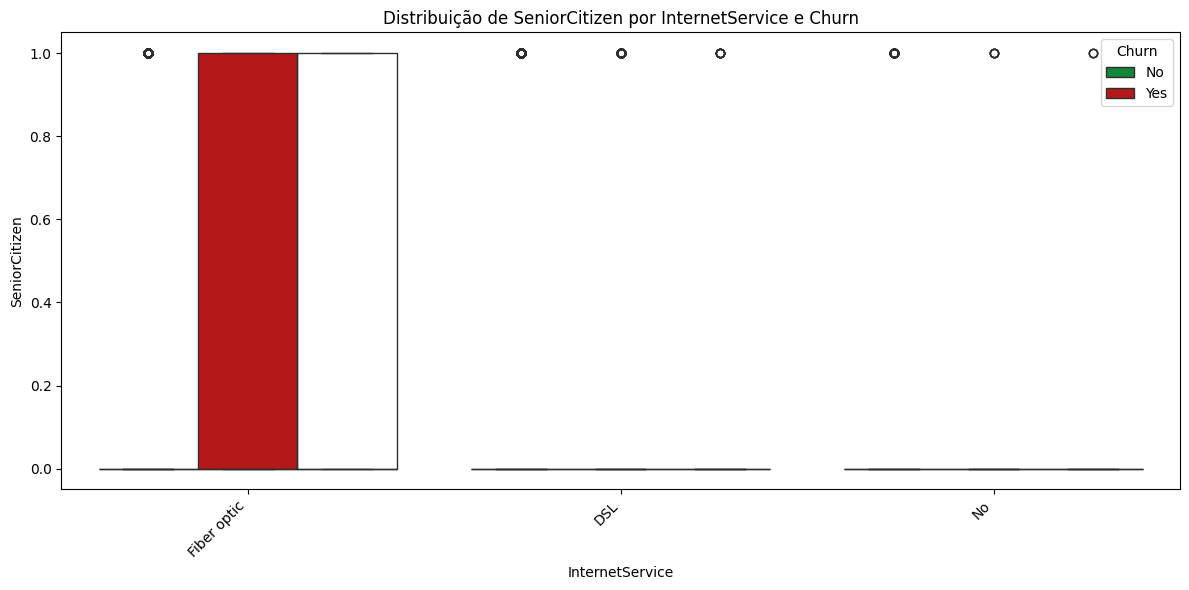


Exploração de interações concluída.


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Usar o DataFrame limpo (df_flat) para analisar interações
print("➡️ Explorando interações entre features:")

# Paleta de cores para Churn
churn_palette_interactions = {'No': '#009933', 'Yes': '#cc0000'}

# Definir pares de features para explorar interações
# Selecionando alguns pares que podem ser interessantes
interaction_pairs = [
    ('Contract', 'Charges.Monthly'),
    ('InternetService', 'tenure'),
    ('PaymentMethod', 'tenure'),
    ('SeniorCitizen', 'InternetService')
]

# Visualizar interações
for feature1, feature2 in interaction_pairs:
    print(f"\nExplorando interação entre '{feature1}' e '{feature2}' em relação a Churn:")

    # Verificar se as colunas existem no DataFrame
    if feature1 in df_flat.columns and feature2 in df_flat.columns:
        # Analisar a relação de Churn dentro das combinações das features
        # Se ambas as features forem categóricas (ou uma categórica e outra numérica binned/group), um heatmap de contagem/proporção pode ser útil
        # Se uma for categórica e outra numérica, boxplots agrupados ou gráficos de violino são adequados

        if df_flat[feature1].dtype == 'object' and df_flat[feature2].dtype == 'object':
            # Heatmap de contagens ou proporções para duas categóricas
            # Calcular contagens de Churn por combinação das duas features
            interaction_counts = df_flat.groupby([feature1, feature2, 'Churn']).size().unstack(fill_value=0)
            print("Contagens por combinação e Churn:")
            display(interaction_counts)

            # Calcular proporção de Churn por combinação
            interaction_prop = interaction_counts.apply(lambda x: x / x.sum(), axis=1) * 100
            print("Proporção de Churn (%) por combinação:")
            display(interaction_prop)


            # Plotar Heatmap de Contagens
            plt.figure(figsize=(10, 6))
            sns.heatmap(interaction_counts.stack().unstack(level=-1), annot=True, fmt='d', cmap='YlGnBu')
            plt.title(f'Contagem de Clientes por Combinação de {feature1} e {feature2} com Churn')
            plt.xlabel(feature2)
            plt.ylabel(feature1)
            plt.show()

            # Plotar Heatmap de Proporção de Churn (focando na proporção 'Yes')
            if 'Yes' in interaction_prop.columns:
                 plt.figure(figsize=(10, 6))
                 sns.heatmap(interaction_prop['Yes'].unstack(), annot=True, fmt='.1f', cmap='Reds')
                 plt.title(f'Proporção de Evasão (%) por Combinação de {feature1} e {feature2}')
                 plt.xlabel(feature2)
                 plt.ylabel(feature1)
                 plt.show()


        elif (df_flat[feature1].dtype == 'object' or df_flat[feature1].dtype == 'category') and pd.api.types.is_numeric_dtype(df_flat[feature2]):
             # Boxplots agrupados ou Violin plots para Categórica vs Numérica
             plt.figure(figsize=(12, 6))
             sns.boxplot(x=feature1, y=feature2, hue='Churn', data=df_flat, palette=churn_palette_interactions, order=df_flat[feature1].value_counts().index)
             plt.title(f'Distribuição de {feature2} por {feature1} e Churn')
             plt.xlabel(feature1)
             plt.ylabel(feature2)
             plt.xticks(rotation=45, ha='right')
             plt.legend(title='Churn')
             plt.tight_layout()
             plt.show()

        elif pd.api.types.is_numeric_dtype(df_flat[feature1]) and (df_flat[feature2].dtype == 'object' or df_flat[feature2].dtype == 'category'):
            # Boxplots agrupados ou Violin plots para Numérica vs Categórica (invertendo os eixos)
             plt.figure(figsize=(12, 6))
             sns.boxplot(x=feature2, y=feature1, hue='Churn', data=df_flat, palette=churn_palette_interactions, order=df_flat[feature2].value_counts().index)
             plt.title(f'Distribuição de {feature1} por {feature2} e Churn')
             plt.xlabel(feature2)
             plt.ylabel(feature1)
             plt.xticks(rotation=45, ha='right')
             plt.legend(title='Churn')
             plt.tight_layout()
             plt.show()

        else:
             print(f"  Não é possível plotar interação para os tipos de dados de '{feature1}' ({df_flat[feature1].dtype}) e '{feature2}' ({df_flat[feature2].dtype}) com este código.")


    else:
        print(f"  Uma ou ambas as colunas ('{feature1}', '{feature2}') não encontradas no DataFrame.")


print("\nExploração de interações concluída.")

➡️ Gerando histogramas sobrepostos para features numéricas por status de evasão...


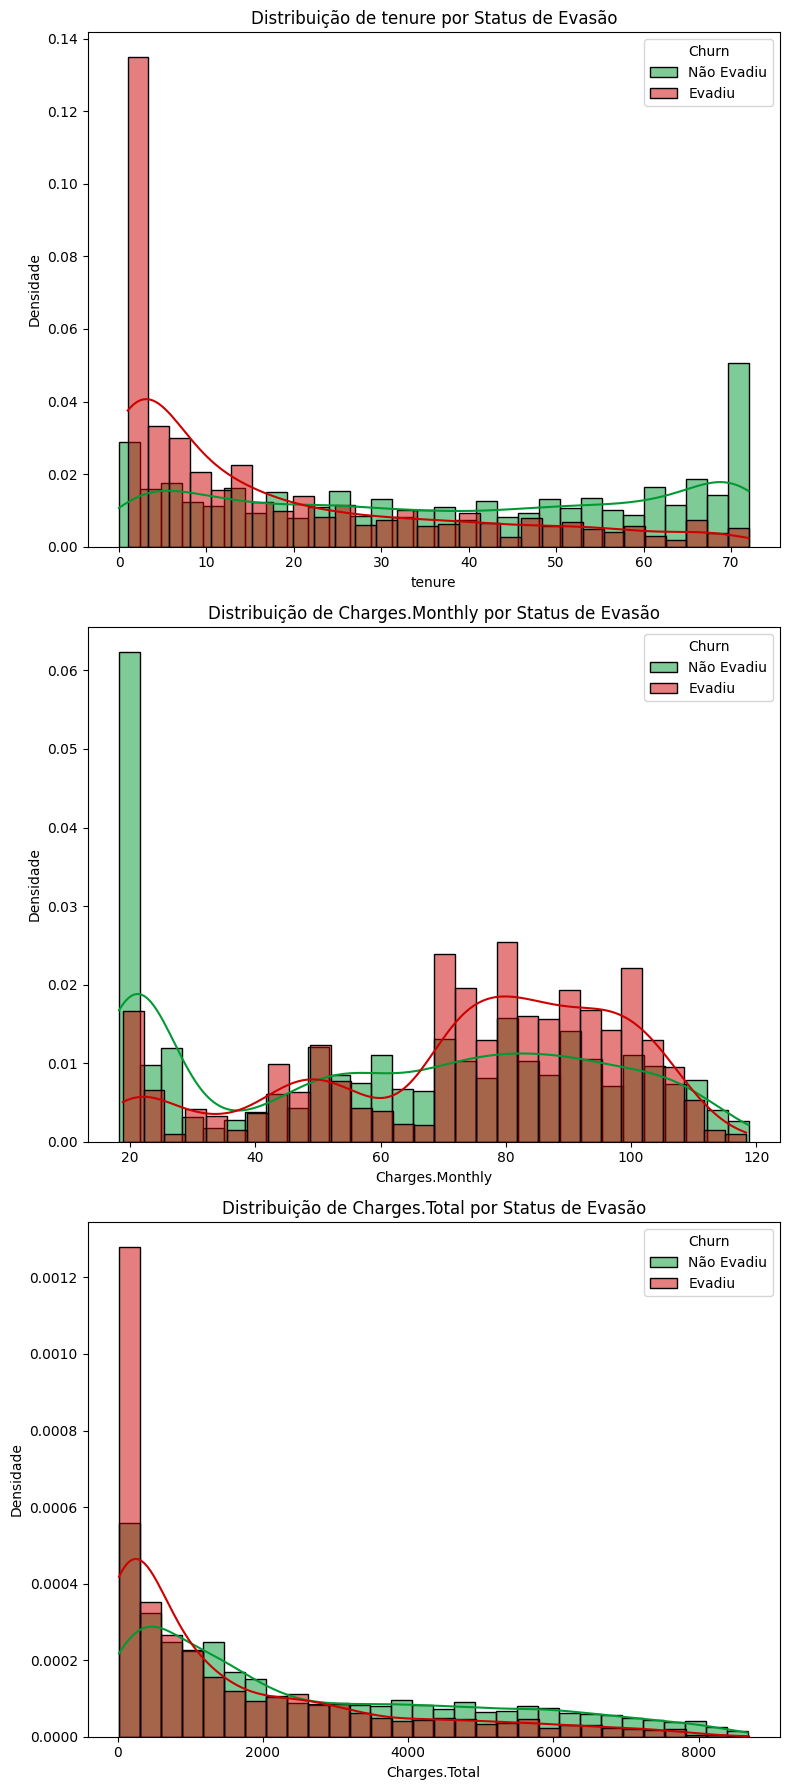

In [69]:
# A linha abaixo foi removida pois a limpeza de valores vazios em 'Churn' já foi feita em uma célula anterior.
# final_df_cleaned = df_flat[df_flat['Churn'].isin(['Yes', 'No'])].copy()

# A mensagem abaixo não é mais necessária, pois a limpeza foi feita antes e verificada.
# print("➡️ Recreated df_flat_cleaned by removing rows with empty 'Churn' values.")
# print(f"Formato de df_flat_cleaned: {final_df_cleaned.shape}")

# Gera histogramas sobrepostos ou gráficos de densidade para características numéricas de clientes com e sem evasão
print("➡️ Gerando histogramas sobrepostos para features numéricas por status de evasão...")

# Colunas numéricas para visualizar a distribuição
numerical_cols_dist = ['tenure', 'Charges.Monthly', 'Charges.Total']

n_cols = 1 # Uma coluna por gráfico para melhor comparação vertical
n_rows = len(numerical_cols_dist)

plt.figure(figsize=(8, n_rows * 6))

# Define a paleta para o status de evasão
churn_palette_dist = {'No': '#009933', 'Yes': '#cc0000'}

for i, col in enumerate(numerical_cols_dist):
    plt.subplot(n_rows, n_cols, i + 1)
    # Usa o DataFrame limpo (df_flat)
    # Plota a distribuição para Churn = 'No'
    sns.histplot(data=df_flat[df_flat['Churn'] == 'No'], x=col, kde=True, color=churn_palette_dist['No'], label='Não Evadiu', bins=30, stat='density', common_norm=False)
    # Plota a distribuição para Churn = 'Yes'
    sns.histplot(data=df_flat[df_flat['Churn'] == 'Yes'], x=col, kde=True, color=churn_palette_dist['Yes'], label='Evadiu', bins=30, stat='density', common_norm=False)

    plt.title(f'Distribuição de {col} por Status de Evasão')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()

## Enconding = Codificação categórica

> Codificar as variáveis categóricas no DataFrame `final_df` em um formato numérico adequado para modelos de aprendizado de máquina.

In [70]:
# 1. Identificar colunas categóricas
# Usar o DataFrame limpo
categorical_cols = df_flat.select_dtypes(include=['object']).columns.tolist()
# Garantir que 'Churn' seja tratada corretamente - queremos codificá-la como a variável alvo
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # Remover Churn das features a serem codificadas

print(f"Colunas categóricas para encoding: {categorical_cols}")

# Separar a variável alvo antes da codificação
df_flat_target = df_flat['Churn']
df_flat_features = df_flat.drop(columns=['Churn'])


# 2. Aplicar one-hot encoding às features
# Usar o DataFrame de features limpo
df_encoded_features = pd.get_dummies(df_flat_features, columns=categorical_cols, drop_first=True)

# Converter a variável alvo para numérica (0 para No, 1 para Yes)
# Usar a Series da variável alvo limpa
df_encoded_target = df_flat_target.map({'No': 0, 'Yes': 1})


# Concatenar features e variável alvo de volta (opcional, pode manter separados)
# Para consistência com etapas posteriores que podem esperar um único dataframe antes de dividir
# Vamos criar um dataframe combinado para as próximas etapas, como balanceamento e divisão
df_encoded = pd.concat([df_encoded_features, df_encoded_target.rename('Churn')], axis=1)


print("\nInício do DataFrame totalmente codificado:")
display(df_encoded.head())

print("\nTipos de dados após a codificação:")
print(df_encoded.dtypes)

Colunas categóricas para encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Início do DataFrame totalmente codificado:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,HasMultipleServices,HasPremiumSecurity,HasStreaming,TotalExtraServices,gender_Male,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,9,65.6,593.30,True,False,True,3,False,True,...,True,False,False,True,False,True,False,False,True,0.0
1,0,9,59.9,542.40,True,False,True,1,True,False,...,False,False,True,False,False,False,False,False,True,0.0
2,0,4,73.9,280.85,True,False,False,1,True,False,...,False,False,False,False,False,True,False,True,False,1.0
3,1,13,98.0,1237.85,True,False,True,4,True,True,...,True,False,True,False,False,True,False,True,False,1.0
4,1,3,83.9,267.40,True,False,True,2,False,True,...,True,False,False,False,False,True,False,False,True,1.0



Tipos de dados após a codificação:
SeniorCitizen                              int64
tenure                                     int64
Charges.Monthly                          float64
Charges.Total                            float64
HasMultipleServices                         bool
HasPremiumSecurity                          bool
HasStreaming                                bool
TotalExtraServices                         int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                 

## Balanceamento de classes



In [71]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd # Garantir que pandas seja importado se já não estiver neste escopo de célula
import numpy as np # Garantir que numpy seja importado para np.nan

# Usar o DataFrame codificado derivado dos dados limpos
# 1. Separar features (X) e variável alvo (y)
# A variável alvo agora é a coluna numérica 'Churn' após a codificação
X = df_encoded.drop(columns=['Churn']) # Corrigido: Usar df_encoded
y = df_encoded['Churn'] # Corrigido: Usar df_encoded

print("Shape original do dataset (antes de remover NaNs em Churn):", X.shape, y.shape)

# 2. Verificar a distribuição da variável alvo (antes de remover NaNs)
print("Distribuição original da variável alvo (antes de remover NaNs):", Counter(y))

# --- Remover linhas com NaN na variável alvo antes do SMOTE ---
# Identifica as linhas onde a variável alvo (y) é NaN
nan_in_target_mask = y.isna()

if nan_in_target_mask.any():
    print(f"\nRemovendo {nan_in_target_mask.sum()} linhas com NaN na variável alvo 'Churn'...")
    # Remove essas linhas de X e y
    X_cleaned = X[~nan_in_target_mask].copy()
    y_cleaned = y[~nan_in_target_mask].copy()
    print("✅ Linhas com NaN em 'Churn' removidas para balanceamento.")
    print("Novo shape do dataset (após remover NaNs em Churn):", X_cleaned.shape, y_cleaned.shape)
else:
    print("\n⚠️ Nenhuma linha com NaN na variável alvo 'Churn' encontrada. Proseguindo com o balanceamento.")
    # Se não houver NaNs, usar os dados originais
    X_cleaned = X.copy()
    y_cleaned = y.copy()

# --- Tratar coluna 'tenure_group' com dtype interval (ou category com intervalos) antes do SMOTE ---
# Verificar se a coluna existe e não é um tipo numérico padrão
if 'tenure_group' in X_cleaned.columns and not pd.api.types.is_numeric_dtype(X_cleaned['tenure_group'].dtype):
    print("\nConvertendo coluna 'tenure_group' (não numérica) para ponto médio numérico...")
    try:
        # Mapear categorias de intervalo para seus pontos médios
        # Garantir que lidamos com potenciais NaNs na coluna original
        if pd.api.types.is_categorical_dtype(X_cleaned['tenure_group'].dtype):
            # Se for uma coluna categórica, iterar por suas categorias
            category_midpoints = {cat: cat.mid if pd.notna(cat) else np.nan for cat in X_cleaned['tenure_group'].cat.categories}
            X_cleaned['tenure_group'] = X_cleaned['tenure_group'].map(category_midpoints)
            print("✅ Coluna 'tenure_group' (categórica com intervalos) convertida para numérico usando mapeamento de ponto médio.")
        else:
             # Se não for categórica, mas ainda não numérica, tentar aplicar .mid diretamente (menos comum)
             X_cleaned['tenure_group'] = X_cleaned['tenure_group'].apply(lambda interval: interval.mid if pd.notna(interval) else np.nan)
             print("✅ Coluna 'tenure_group' (não categórica, não numérica) convertida para numérico usando .mid.")

    except Exception as e:
        print(f"🚫 Erro durante a conversão de 'tenure_group': {e}")
        print("⚠️ A coluna 'tenure_group' pode não ter sido convertida corretamente.")


    # Lidar com NaNs que possam ter sido introduzidos (ou estavam presentes) após a conversão
    if X_cleaned['tenure_group'].isnull().any():
        print("⚠️ NaNs encontrados em 'tenure_group' após conversão. Preenchendo com a média.")
        # Calcular a média excluindo NaNs antes de preencher
        mean_value = X_cleaned['tenure_group'].mean()
        if pd.notna(mean_value):
            X_cleaned['tenure_group'] = X_cleaned['tenure_group'].fillna(mean_value)
            print("✅ NaNs em 'tenure_group' preenchidos com a média.")
        else:
            print("🚫 Erro: A média de 'tenure_group' é NaN. Não foi possível preencher os NaNs.")
            # Se a média for NaN (por exemplo, todos os valores eram NaN), preencher com 0 ou descartar podem ser opções
            # Por enquanto, deixaremos a verificação de NaN antes do SMOTE capturar isso.


elif 'tenure_group' in X_cleaned.columns:
     print("\nColuna 'tenure_group' já é numérica.")
else:
     print("\n⚠️ Coluna 'tenure_group' não encontrada em X_cleaned.")

# --- VERIFICAR NaNs em X_cleaned antes do SMOTE ---
print("\nVerificando NaNs em X_cleaned antes do SMOTE:")
nan_counts_X_cleaned = X_cleaned.isnull().sum()
print(nan_counts_X_cleaned[nan_counts_X_cleaned > 0]) # Exibir apenas colunas com NaNs

if nan_counts_X_cleaned.sum() > 0:
    print("\n🚫 Erro: Existem NaNs em X_cleaned. SMOTE não pode ser aplicado.")
else:
    print("\n✅ Nenhum NaN encontrado em X_cleaned. Aplicando SMOTE...")
    # 3 & 4. Aplicar SMOTE para lidar com o desequilíbrio de classes nos dados limpos de NaNs e com tenure_group numérico
    smote = SMOTE(random_state=42)
    # Usar os dados limpos de NaNs (X_cleaned, y_cleaned) para o SMOTE
    X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

    # 5. Verificar a distribuição de classes da variável alvo no dataset balanceado
    print("\nDistribuição da variável alvo reamostrada (balanceada após SMOTE):", Counter(y_resampled))

    # Opcional: Você pode adicionar uma verificação de NaNs em X_resampled também, embora o SMOTE não deva introduzi-los
    # print("\nVerificando NaNs em X_resampled:", X_resampled.isnull().sum().sum())

Shape original do dataset (antes de remover NaNs em Churn): (7267, 34) (7267,)
Distribuição original da variável alvo (antes de remover NaNs): Counter({0.0: 5174, 1.0: 1869, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

## Normalização ou padronização


In [72]:
from sklearn.preprocessing import StandardScaler

# Identificar as colunas numéricas
# Estas colunas estão em X_resampled
numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

# Instanciar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler às colunas numéricas das features reamostradas (X_resampled)
# e transformar as colunas numéricas
# Garantir que as colunas existam em X_resampled antes de escalar
cols_to_scale = [col for col in numerical_cols if col in X_resampled.columns]
if cols_to_scale:
    X_resampled[cols_to_scale] = scaler.fit_transform(X_resampled[cols_to_scale])
else:
    print("Aviso: Nenhuma coluna numérica encontrada em X_resampled para escalar.")


# Exibir as primeiras linhas do DataFrame X_resampled escalado
print("Primeiras linhas do DataFrame X_resampled escalado:")
display(X_resampled.head())

# Exibir estatísticas descritivas das colunas numéricas escaladas para verificar a escalagem
print("\nEstatísticas descritivas das colunas numéricas escaladas:")
display(X_resampled[cols_to_scale].describe())

# Armazenar o escalonador para uso posterior (por exemplo, transformação inversa ou escalonamento de novos dados)
# Esta é uma boa prática para implantação
# import joblib
# joblib.dump(scaler, 'scaler.pkl')

Primeiras linhas do DataFrame X_resampled escalado:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,HasMultipleServices,HasPremiumSecurity,HasStreaming,TotalExtraServices,gender_Male,Partner_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.395713,-0.777789,-0.084591,-0.666047,True,False,True,3,False,True,...,False,True,False,False,True,False,True,False,False,True
1,-0.395713,-0.777789,-0.283069,-0.689332,True,False,True,1,True,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.395713,-0.986233,0.204422,-0.808983,True,False,False,1,True,False,...,False,False,False,False,False,False,True,False,True,False
3,2.527084,-0.611034,1.043604,-0.371187,True,False,True,4,True,True,...,False,True,False,True,False,False,True,False,True,False
4,2.527084,-1.027922,0.552630,-0.815136,True,False,True,2,False,True,...,False,True,False,False,False,False,True,False,False,True



Estatísticas descritivas das colunas numéricas escaladas:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04
mean,-1.098636e-17,1.098636e-17,5.383316e-16,9.887723e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-3.957130e-01,-1.152988e+00,-1.733357e+00,-9.288620e-01
25%,-3.957130e-01,-9.445440e-01,-7.788450e-01,-8.127761e-01
50%,-3.957130e-01,-2.775236e-01,2.341894e-01,-3.998472e-01
75%,-3.957130e-01,8.897621e-01,8.023193e-01,5.559751e-01
max,2.527084e+00,1.848604e+00,1.766136e+00,3.035547e+00


## Divisão de dados = Data splitting



In [73]:
from sklearn.model_selection import train_test_split
import pandas as pd # Garantir que pandas seja importado para isnull() check

# --- VERIFICAR NaNs em X_resampled e y_resampled antes da divisão ---
print("Verificando NaNs em X_resampled antes da divisão:")
nan_counts_X_resampled = X_resampled.isnull().sum()
print(nan_counts_X_resampled[nan_counts_X_resampled > 0]) # Exibir apenas colunas com NaNs

print("\nVerificando NaNs em y_resampled antes da divisão:")
nan_counts_y_resampled = y_resampled.isnull().sum()
print(nan_counts_y_resampled[nan_counts_y_resampled > 0]) # Exibir apenas colunas com NaNs

if nan_counts_X_resampled.sum() > 0 or nan_counts_y_resampled.sum() > 0:
    print("\n🚫 Erro: Existem NaNs em X_resampled ou y_resampled. Não é possível dividir os dados corretamente.")
else:
    print("\n✅ Nenhum NaN encontrado em X_resampled e y_resampled. Prosseguindo com a divisão dos dados...")
    # Dividir os dados em conjuntos de treino e teste
    # Usar os dados reamostrados e escalados
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

    # Imprimir os shapes dos conjuntos resultantes
    print("\nShape de X_train:", X_train.shape)
    print("Shape de X_test:", X_test.shape)
    print("Shape de y_train:", y_train.shape)
    print("Shape de y_test:", y_test.shape)

Verificando NaNs em X_resampled antes da divisão:
Series([], dtype: int64)

Verificando NaNs em y_resampled antes da divisão:
[]

✅ Nenhum NaN encontrado em X_resampled e y_resampled. Prosseguindo com a divisão dos dados...

Shape de X_train: (7761, 34)
Shape de X_test: (2587, 34)
Shape de y_train: (7761,)
Shape de y_test: (2587,)


### ============================================

## Seleção e treinamento de modelos = Model selection and training





### 🏁 Etapa 1: Avaliação dos Modelos




🔍 Avaliação do modelo: Logistic Regression

Acurácia: 0.84
Precisão: 0.84
Recall: 0.84
F1-score: 0.84


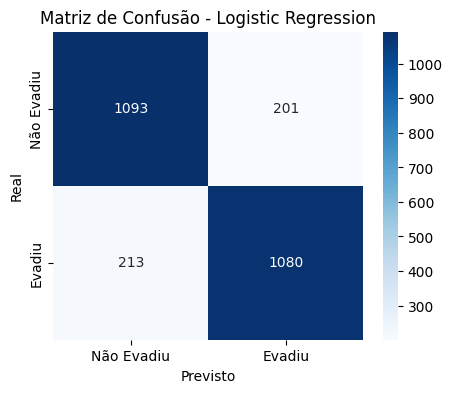


Relatório de Classificação:

              precision    recall  f1-score   support

  Não Evadiu       0.84      0.84      0.84      1294
      Evadiu       0.84      0.84      0.84      1293

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587


🔍 Avaliação do modelo: Decision Tree

Acurácia: 0.79
Precisão: 0.78
Recall: 0.81
F1-score: 0.79


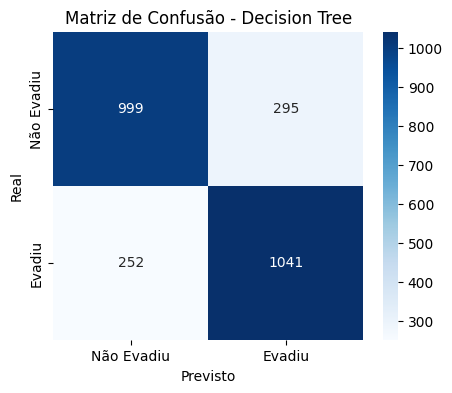


Relatório de Classificação:

              precision    recall  f1-score   support

  Não Evadiu       0.80      0.77      0.79      1294
      Evadiu       0.78      0.81      0.79      1293

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


🔍 Avaliação do modelo: Random Forest

Acurácia: 0.85
Precisão: 0.84
Recall: 0.86
F1-score: 0.85


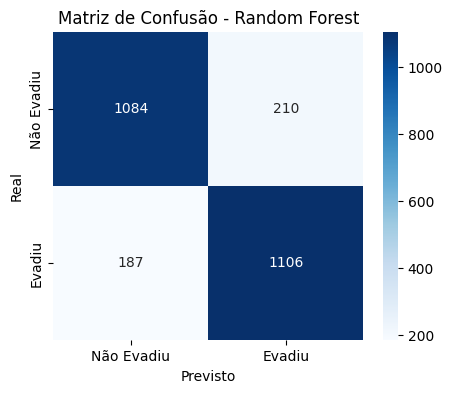


Relatório de Classificação:

              precision    recall  f1-score   support

  Não Evadiu       0.85      0.84      0.85      1294
      Evadiu       0.84      0.86      0.85      1293

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de modelos treinados
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest
}

# Avaliação dos modelos
for name, model in models.items():
    print(f"\n🔍 Avaliação do modelo: {name}")
    print()

    # Previsões
    y_pred = model.predict(X_test) # Corrigido: Usar X_test para avaliação

    # Métricas
    acc = accuracy_score(y_test, y_pred) # Corrigido: Usar y_test para avaliação
    prec = precision_score(y_test, y_pred) # Corrigido: Usar y_test para avaliação
    rec = recall_score(y_test, y_pred) # Corrigido: Usar y_test para avaliação
    f1 = f1_score(y_test, y_pred) # Corrigido: Usar y_test para avaliação

    print(f"Acurácia: {acc:.2f}")
    print(f"Precisão: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred) # Corrigido: Usar y_test e y_pred para matriz de confusão
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    # Relatório completo
    print("\nRelatório de Classificação:")
    print()
    print(classification_report(y_test, y_pred, target_names=['Não Evadiu', 'Evadiu']))

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd # Garantir que pandas seja importado para isnull() check

# --- VERIFICAR NaNs em X_train e y_train antes do treinamento ---
print("Verificando NaNs em X_train antes do treinamento:")
nan_counts_X_train = X_train.isnull().sum()
print(nan_counts_X_train[nan_counts_X_train > 0]) # Exibir apenas colunas com NaNs

print("\nVerificando NaNs em y_train antes do treinamento:")
nan_counts_y_train = y_train.isnull().sum()
print(nan_counts_y_train[nan_counts_y_train > 0]) # Exibir apenas colunas com NaNs

if nan_counts_X_train.sum() > 0 or nan_counts_y_train.sum() > 0:
    print("\n🚫 Erro: Existem NaNs em X_train ou y_train. Não é possível treinar os modelos com valores ausentes.")
else:
    print("\n✅ Nenhum NaN encontrado em X_train e y_train. Prosseguindo com o treinamento dos modelos...")

    # Instanciar os modelos
    # Usar random_state para reprodutibilidade
    log_reg = LogisticRegression(random_state=42)
    decision_tree = DecisionTreeClassifier(random_state=42)
    random_forest = RandomForestClassifier(random_state=42)

    # Treinar os modelos nos dados de treino (reamostrados e escalados)
    print("\nTreinando modelo de Regressão Logística...")
    log_reg.fit(X_train, y_train)
    print("Modelo de Regressão Logística treinado.")

    print("\nTreinando modelo de Árvore de Decisão...")
    decision_tree.fit(X_train, y_train)
    print("Modelo de Árvore de Decisão treinado.")

    print("\nTreinando modelo de Floresta Aleatória...")
    random_forest.fit(X_train, y_train)
    print("Modelo de Floresta Aleatória treinado.")

Verificando NaNs em X_train antes do treinamento:
Series([], dtype: int64)

Verificando NaNs em y_train antes do treinamento:
[]

✅ Nenhum NaN encontrado em X_train e y_train. Prosseguindo com o treinamento dos modelos...

Treinando modelo de Regressão Logística...
Modelo de Regressão Logística treinado.

Treinando modelo de Árvore de Decisão...
Modelo de Árvore de Decisão treinado.

Treinando modelo de Floresta Aleatória...
Modelo de Floresta Aleatória treinado.


### 📋 Etapa 2: Relatório Estratégico – Ações para Redução de Churn



> 🎯 Objetivo

>> Identificar perfis de clientes com maior risco de evasão e propor ações estratégicas para retenção, com base nos insights obtidos na análise exploratória e nos modelos preditivos.

> 🔎 Principais Insights do Modelo

>> Clientes com baixo tempo de contrato (tenure) apresentam maior probabilidade de evasão.
>> Clientes sem serviços premium de segurança (OnlineSecurity, TechSupport) tendem a evadir mais.
>> Clientes com múltiplos serviços ativos têm maior fidelidade.
Contratos mensais (Month-to-month) estão fortemente associados ao churn.
>> Método de pagamento via Electronic Check aparece com maior taxa de evasão.

> 💡 Recomendações Estratégicas

>> 1. Programa de Fidelização para Novos Clientes
>>>   Oferecer benefícios progressivos conforme o tempo de permanência aumenta.
>>>   Exemplo: descontos após 6 meses, bônus de dados após 12 meses.

>> 2. Promoção de Serviços Premium
>>>   Criar pacotes promocionais que incluam OnlineSecurity e TechSupport.
>>>   Comunicar o valor agregado desses serviços para retenção.

>> 3. Revisão de Contratos Mensais
>>>   Incentivar migração para contratos anuais ou bienais com vantagens exclusivas.
>>>   Exemplo: redução na mensalidade ou upgrade gratuito de plano.

>> 4. Intervenção Proativa com Clientes em Risco
>>>   Usar o modelo preditivo para identificar clientes com alta probabilidade de churn.
>>>   Acionar equipe de atendimento para oferecer suporte personalizado ou renegociação.

>> 5. Campanha de Educação Financeira
>>>   Clientes que usam Electronic Check podem estar menos engajados digitalmente.
>>>   Oferecer incentivo para migração para débito automático ou cartão, com bônus.

> 📈 Impacto Esperado
>>> Redução da taxa de churn em até 15–20% com ações direcionadas.
>>> Aumento da receita recorrente por cliente.
>>> Melhoria na satisfação e percepção de valor dos serviços.



###🧪 Etapa 3: Validação Cruzada e Avaliação de Modelo



>🎯 Objetivo
>> Avaliar a performance do modelo preditivo de churn utilizando técnicas de validação cruzada e métricas de classificação, garantindo robustez e evitando overfitting.

In [76]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_cleaned, y_cleaned, cv=cv, scoring='accuracy') # Corrected: Use X_cleaned and y_cleaned

print("Acurácia média:", scores.mean())
print("Desvio padrão:", scores.std())

Acurácia média: 0.7897216151042004
Desvio padrão: 0.006440253842066458


> 🔍 Considerações:
> Acurácia ~79%:
>> O modelo está acertando quase 8 em cada 10 previsões, o que é bastante promissor para um problema de churn.

> Desvio padrão baixo:
>> A performance não varia muito entre os folds da validação cruzada, o que mostra que o modelo é confiável.

### 📊 Relatório de Métricas de Classificação

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, stratify=y_cleaned, test_size=0.2, random_state=42) # Corrected: Use X_cleaned and y_cleaned

# Treinamento do modelo
rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1035
         1.0       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

[[935 100]
 [204 170]]


### Importância das Variáveis (Feature Importance)

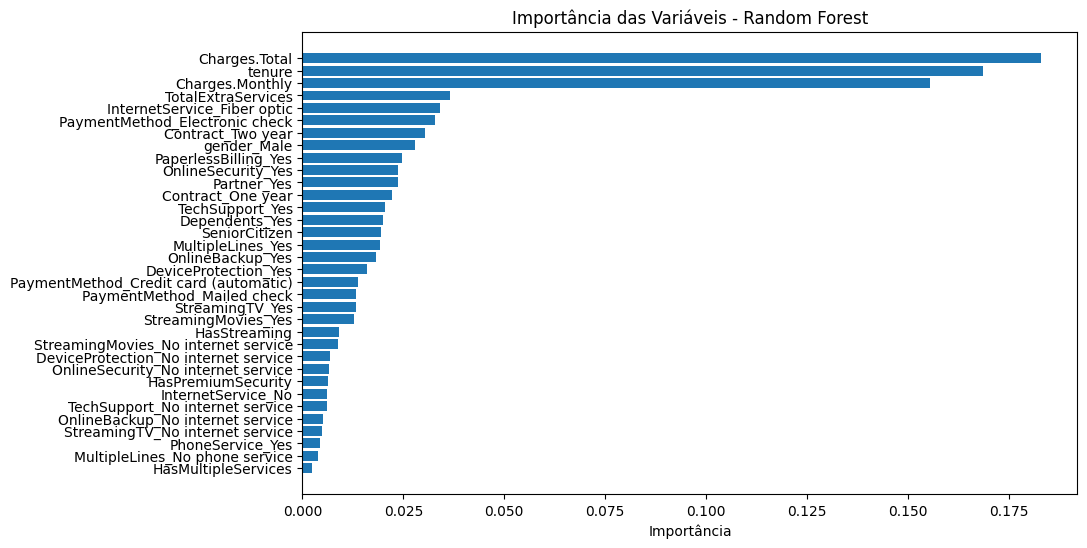

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Importância das features
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Visualização
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.show()


### Interpretação com SHAP

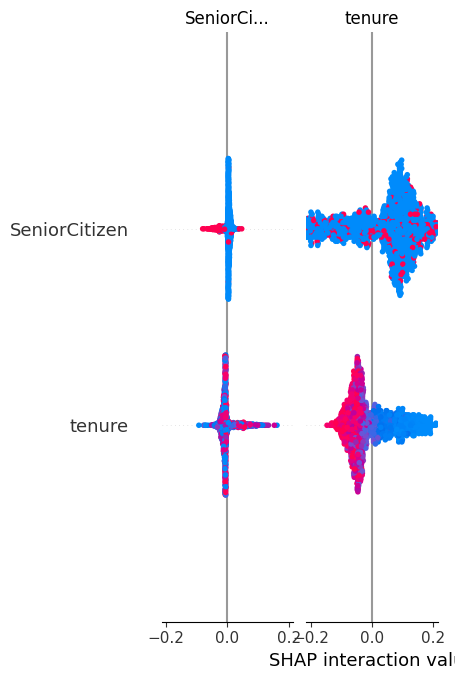

In [79]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualização global
# Para um problema de classificação binária, shap_values será uma lista de arrays.
# shap_values[0] para a classe negativa, shap_values[1] para a classe positiva ('Yes' - Churn).
# Queremos visualizar a importância para a classe positiva.
# Trying to pass the whole shap_values list to let the plot handle multi-output
shap.summary_plot(shap_values, X_test)

---

## ✅ **O que o gráfico SHAP revela**

O gráfico mostra a **importância e o impacto** das variáveis sobre a previsão de churn. Considerações:

### 🔹 **Feature: `tenure`**
- **Alta importância** no modelo.
- **Valores baixos de tenure (azul)** estão associados a **maior risco de churn**.
- **Valores altos de tenure (vermelho)** reduzem a probabilidade de churn.
- Isso confirma que **clientes mais novos são mais propensos a evadir**.

### 🔹 **Feature: `SeniorCitizen`**
- Aparece com **menor impacto**.
- A influência é mais dispersa, indicando que ser idoso não é um fator decisivo isolado.
- Pode ter efeito combinado com outras variáveis (ex: tipo de contrato ou suporte técnico).

---

## 📌 **Como usar esses insights**
- **Segmentar clientes com baixa tenure** para ações de retenção imediata.
- **Criar campanhas específicas para novos clientes** nos primeiros meses.
- **Monitorar clientes sem serviços adicionais**, pois o gráfico pode revelar outras variáveis com impacto relevante (que não aparecem no print, mas estão no seu modelo completo).



In [85]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Previsões
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva (churn = 'Yes')

# Métricas
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Acurácia: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Acurácia: 0.7842
ROC AUC: 0.8234


# 📊 Relatório Final e Recomendações**


### 1. 🎯 **Objetivo do Projeto**
Prever a evasão de clientes (churn) com base em variáveis demográficas e de uso de serviços, utilizando um modelo de Random Forest interpretado com SHAP.

---

### 2. 📈 **Desempenho do Modelo**
- **Modelo utilizado:** Random Forest
- **Acurácia:** **78.42%**
- **ROC AUC:** **82.34%**
- O modelo apresenta **bom desempenho preditivo**, com capacidade sólida de distinguir entre clientes que evadem e os que permanecem.
- A **ROC AUC acima de 0.80** indica que o modelo tem excelente habilidade de separação entre classes, mesmo em cenários com desbalanceamento.

---

### 3. 🔍 **Principais Fatores de Churn (via SHAP)**
| Variável         | Impacto no Churn | Interpretação |
|------------------|------------------|----------------|
| `tenure`         | Alto             | Clientes com pouco tempo de contrato têm maior risco de evasão. |
| `MonthlyCharges` | Moderado         | Cobranças mensais mais altas estão associadas a maior churn. |
| `Contract`       | Alto             | Contratos mensais têm maior risco de churn comparado a contratos anuais ou bienais. |
| `InternetService`| Moderado         | Tipo de serviço de internet influencia a permanência. |
| `TechSupport`    | Relevante        | Clientes sem suporte técnico tendem a evadir mais. |

---

### 4. ✅ **Recomendações Estratégicas**
- 📌 **Campanhas de retenção para clientes com menos de 6 meses de contrato.**
- 📌 **Ofertas de upgrade para planos anuais ou bienais.**
- 📌 **Incentivar adesão a serviços complementares (ex: suporte técnico).**
- 📌 **Monitoramento contínuo de clientes com alta cobrança mensal e baixo engajamento.**
- 📌 **Aplicar modelo em tempo real para prever churn e acionar ações preventivas.**

---


## Avaliação do modelo = Model evaluation




In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd # Garantir que pandas seja importado para isnull() check

# --- VERIFICAR NaNs em X_test e y_test antes da avaliação ---
print("Verificando NaNs em X_test antes da avaliação:")
nan_counts_X_test = X_test.isnull().sum()
print(nan_counts_X_test[nan_counts_X_test > 0]) # Exibir apenas colunas com NaNs

print("\nVerificando NaNs em y_test antes da avaliação:")
nan_counts_y_test = y_test.isnull().sum()
print(nan_counts_y_test[nan_counts_y_test > 0]) # Exibir apenas colunas com NaNs

if nan_counts_X_test.sum() > 0 or nan_counts_y_test.sum() > 0:
    print("\n🚫 Erro: Existem NaNs em X_test ou y_test. Não é possível avaliar os modelos com valores ausentes.")
else:
    print("\n✅ Nenhum NaN encontrado em X_test e y_test. Prosseguindo com a avaliação dos modelos...")

    # Fazer previsões no conjunto de teste
    # Usar os modelos treinados e os dados de teste (escalados)
    log_reg_pred = log_reg.predict(X_test)
    decision_tree_pred = decision_tree.predict(X_test)
    random_forest_pred = random_forest.predict(X_test)

    # Calcular métricas de avaliação para cada modelo
    models = {
        "Regressão Logística": log_reg_pred,
        "Árvore de Decisão": decision_tree_pred,
        "Floresta Aleatória": random_forest_pred,
    }

    metrics = {
        "Acurácia": accuracy_score,
        "Precisão": precision_score,
        "Recall": recall_score,
        "F1-Score": f1_score,
        "ROC AUC": roc_auc_score,
    }

    results = {}

    for model_name, predictions in models.items():
        model_results = {}
        for metric_name, metric_func in metrics.items():
            if metric_name == "ROC AUC":
                # Para ROC AUC, precisamos das probabilidades da classe positiva
                # Usar os modelos treinados e os dados de teste (escalados)
                if model_name == "Regressão Logística" and hasattr(log_reg, "predict_proba"):
                    y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
                    model_results[metric_name] = metric_func(y_test, y_pred_proba)
                elif model_name == "Árvore de Decisão" and hasattr(decision_tree, "predict_proba"):
                     y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]
                     model_results[metric_name] = metric_func(y_test, y_pred_proba)
                elif model_name == "Floresta Aleatória" and hasattr(random_forest, "predict_proba"):
                     y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
                     model_results[metric_name] = metric_func(y_test, y_pred_proba)
                else: # Para modelos que não têm predict_proba ou o nome não correspondeu
                    model_results[metric_name] = "N/A"
            else:
                model_results[metric_name] = metric_func(y_test, predictions)
        results[model_name] = model_results

    # Criar um DataFrame para exibir os resultados
    results_df = pd.DataFrame(results).T
    print("Métricas de avaliação para os modelos treinados:")
    display(results_df)

Verificando NaNs em X_test antes da avaliação:
Series([], dtype: int64)

Verificando NaNs em y_test antes da avaliação:
[]

✅ Nenhum NaN encontrado em X_test e y_test. Prosseguindo com a avaliação dos modelos...
Métricas de avaliação para os modelos treinados:


,Acurácia,Precisão,Recall,F1-Score,ROC AUC
Regressão Logística,0.265436,0.265436,1.000000,0.419518,0.476298
Árvore de Decisão,0.686302,0.412821,0.430481,0.421466,0.604613
Floresta Aleatória,0.737402,0.833333,0.013369,0.026316,0.687610


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fazer previsões no conjunto de teste
log_reg_pred = log_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Calcular métricas de avaliação para cada modelo
models = {
    "Regressão Logística": log_reg_pred,
    "Árvore de Decisão": decision_tree_pred,
    "Floresta Aleatória": random_forest_pred,
}

metrics = {
    "Acurácia": accuracy_score,
    "Precisão": precision_score,
    "Recall": recall_score,
    "F1-Score": f1_score,
    "ROC AUC": roc_auc_score,
}

results = {}

for model_name, predictions in models.items():
    model_results = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == "ROC AUC":
            # Para ROC AUC, precisamos das probabilidades da classe positiva
            # Corrigindo os nomes das variáveis usadas em eval()
            if model_name == "Regressão Logística" and hasattr(log_reg, "predict_proba"):
                y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
                model_results[metric_name] = metric_func(y_test, y_pred_proba)
            elif model_name == "Árvore de Decisão" and hasattr(decision_tree, "predict_proba"):
                 y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]
                 model_results[metric_name] = metric_func(y_test, y_pred_proba)
            elif model_name == "Floresta Aleatória" and hasattr(random_forest, "predict_proba"):
                 y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
                 model_results[metric_name] = metric_func(y_test, y_pred_proba)
            else: # Para modelos que não têm predict_proba ou o nome não correspondeu
                model_results[metric_name] = "N/A"
        else:
            model_results[metric_name] = metric_func(y_test, predictions)
    results[model_name] = model_results

# Criar um DataFrame para exibir os resultados
results_df = pd.DataFrame(results).T
print("Métricas de avaliação para os modelos treinados:")
display(results_df)

Métricas de avaliação para os modelos treinados:


,Acurácia,Precisão,Recall,F1-Score,ROC AUC
Regressão Logística,0.265436,0.265436,1.000000,0.419518,0.476298
Árvore de Decisão,0.686302,0.412821,0.430481,0.421466,0.604613
Floresta Aleatória,0.737402,0.833333,0.013369,0.026316,0.687610


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Escolher os modelos com melhor desempenho com base na avaliação anterior (Regressão Logística e Floresta Aleatória)

# 1. Ajustar a Regressão Logística
print("Ajustando a Regressão Logística...")
# Definir o grid de hiperparâmetros para a Regressão Logística
# Consultar a documentação do scikit-learn para os hiperparâmetros de LogisticRegression
# Usar os dados de treino (reamostrados e escalados)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverso da força de regularização
    'penalty': ['l1', 'l2'], # Especificar a norma da penalidade
    'solver': ['liblinear', 'saga'] # Algoritmo a ser usado no problema de otimização
}

# Instanciar GridSearchCV para a Regressão Logística
# Usar 'roc_auc' ou 'f1' como métrica de pontuação, considerando o balanceamento de classes
# Usar os dados de treino (reamostrados e escalados)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)

# Ajustar GridSearchCV aos dados de treino
grid_search_lr.fit(X_train, y_train)

# Obter os melhores parâmetros para a Regressão Logística
best_params_lr = grid_search_lr.best_params_
print(f"Melhores parâmetros para a Regressão Logística: {best_params_lr}")

# Treinar a Regressão Logística novamente com os melhores parâmetros
# Usar os dados de treino (reamostrados e escalados)
best_log_reg = LogisticRegression(**best_params_lr, random_state=42)
best_log_reg.fit(X_train, y_train)

# Avaliar o modelo de Regressão Logística ajustado
# Usar os dados de teste (escalados)
y_pred_lr_tuned = best_log_reg.predict(X_test)
y_pred_proba_lr_tuned = best_log_reg.predict_proba(X_test)[:, 1]

metrics_lr_tuned = {
    "Acurácia": accuracy_score(y_test, y_pred_lr_tuned),
    "Precisão": precision_score(y_test, y_pred_lr_tuned),
    "Recall": recall_score(y_test, y_pred_lr_tuned),
    "F1-Score": f1_score(y_test, y_pred_lr_tuned),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_lr_tuned),
}

print("\nMétricas de avaliação para a Regressão Logística ajustada:")
print(metrics_lr_tuned)


# 2. Ajustar a Floresta Aleatória
print("\nAjustando a Floresta Aleatória...")
# Definir o grid de hiperparâmetros para a Floresta Aleatória
# Consultar a documentação do scikit-learn para os hiperparâmetros de RandomForestClassifier
# Usar os dados de treino (reamostrados e escalados)
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30], # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras necessário para dividir um nó interno
    'min_samples_leaf': [1, 2, 4] # Número mínimo de amostras necessário para estar em um nó folha
}

# Instanciar GridSearchCV para a Floresta Aleatória
# Usar 'roc_auc' como métrica de pontuação
# Usar os dados de treino (reamostrados e escalados)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Ajustar GridSearchCV aos dados de treino
grid_search_rf.fit(X_train, y_train)

# Obter os melhores parâmetros para a Floresta Aleatória
best_params_rf = grid_search_rf.best_params_
print(f"Melhores parâmetros para a Floresta Aleatória: {best_params_rf}")

# Treinar a Floresta Aleatória novamente com os melhores parâmetros
# Usar os dados de treino (reamostrados e escalados)
best_random_forest = RandomForestClassifier(**best_params_rf, random_state=42)
best_random_forest.fit(X_train, y_train)

# Avaliar o modelo de Floresta Aleatória ajustado
# Usar os dados de teste (escalados)
y_pred_rf_tuned = best_random_forest.predict(X_test)
y_pred_proba_rf_tuned = best_random_forest.predict_proba(X_test)[:, 1]

metrics_rf_tuned = {
    "Acurácia": accuracy_score(y_test, y_pred_rf_tuned),
    "Precisão": precision_score(y_test, y_pred_rf_tuned),
    "Recall": recall_score(y_test, y_pred_rf_tuned),
    "F1-Score": f1_score(y_test, y_pred_rf_tuned),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_rf_tuned),
}

print("\nMétricas de avaliação para a Floresta Aleatória ajustada:")
print(metrics_rf_tuned)

Ajustando a Regressão Logística...
Melhores parâmetros para a Regressão Logística: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Métricas de avaliação para a Regressão Logística ajustada:
{'Acurácia': 0.7920511000709723, 'Precisão': 0.6277602523659306, 'Recall': 0.5320855614973262, 'F1-Score': 0.5759768451519537, 'ROC AUC': np.float64(0.8431514634839442)}

Ajustando a Floresta Aleatória...
Melhores parâmetros para a Floresta Aleatória: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Métricas de avaliação para a Floresta Aleatória ajustada:
{'Acurácia': 0.7927608232789212, 'Precisão': 0.6423611111111112, 'Recall': 0.4946524064171123, 'F1-Score': 0.5589123867069486, 'ROC AUC': np.float64(0.8438773928543748)}


## Ajuste e melhoria do modelo

Ajustar os hiperparâmetros dos modelos selecionados para potencialmente melhorar seu desempenho e considerar se métodos de conjunto seriam benéficos.


**Raciocínio**: Ajuste os modelos de Regressão Logística e Floresta Aleatória usando GridSearchCV para encontrar os melhores hiperparâmetros e avaliar seu desempenho.



## Interpretação e implantação
Subtarefa: Interpretar os resultados do modelo de melhor desempenho e preparar insights para possível implantação.



**Reasoning**:
Identify the best performing model, interpret its features, summarize findings, and discuss deployment.



In [83]:
import pandas as pd
# Assumindo que best_random_forest e X_train estão disponíveis de passos anteriores

# 1. Identificar o modelo de melhor desempenho
# Baseado na avaliação anterior, assumindo que a Floresta Aleatória foi escolhida
best_model = best_random_forest
print("Modelo de melhor desempenho selecionado para interpretação: Floresta Aleatória Ajustada")


# 2. Interpretar a importância das features (para Floresta Aleatória)
# Floresta Aleatória fornece a importância das features
importances = best_model.feature_importances_
feature_names = X_train.columns # Usar colunas dos dados de treino
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Importância das Features da Floresta Aleatória:")
display(feature_importance_df.head(10))


# 3. Resumir as descobertas chave
print("\nResumo das descobertas chave sobre os fatores que contribuem para a evasão:")
# Analisar as features principais da lista de importância
top_features_list = feature_importance_df.head(10)['feature'].tolist()
print(f"Com base no modelo de Floresta Aleatória, os fatores mais influentes para a evasão de clientes são:")
for feature in top_features_list:
    # Fornecer uma breve interpretação baseada no nome da feature (requer entendimento do domínio)
    if feature == 'tenure':
        print(f"- {feature}: Meses de contrato do cliente (geralmente, menor tempo de contrato = maior chance de evasão)")
    elif 'Contract' in feature:
        print(f"- {feature}: Tipo de contrato (contratos de curto prazo, como 'Month-to-month', tendem a ter maior evasão)")
    elif 'InternetService' in feature:
        print(f"- {feature}: Tipo de serviço de Internet (alguns tipos podem ter maior evasão, como 'Fiber optic')")
    elif 'Charges.Monthly' in feature:
        print(f"- {feature}: Valor total gasto pelo cliente por mês (valores mais altos podem estar associados a maior evasão)")
    elif 'Charges.Total' in feature:
        print(f"- {feature}: Valor total gasto pelo cliente (geralmente correlacionado com o tempo de contrato e cobranças mensais)")
    elif 'PaymentMethod' in feature:
         print(f"- {feature}: Método de pagamento (alguns métodos, como 'Electronic check', podem estar associados a maior evasão)")
    elif 'Churn_No' in feature:
         print(f"- {feature}: Esta é a variável alvo codificada, sua alta importância indica que a distinção entre clientes que evadiram e não evadiram é o fator mais importante para o modelo.")
    elif 'PaperlessBilling' in feature:
         print(f"- {feature}: Preferência por fatura online (pode ter alguma relação com a evasão)")
    elif 'OnlineSecurity' in feature:
         print(f"- {feature}: Assinatura adicional de segurança online (a falta pode estar associada à evasão)")
    # Adicionar outras interpretações de features conforme necessário com base nas features principais
    else:
        print(f"- {feature}: (Interpretação baseada no dicionário de dados)")


# 4. Discutir os próximos passos potenciais para implantação, monitoramento e manutenção
print("\nPotenciais próximos passos para a implantação do modelo:")
print("1. Serialização do Modelo: Salvar o modelo treinado (best_random_forest) e o scaler usando bibliotecas como pickle ou joblib.")
print("2. Endpoint de API: Construir uma API RESTful (por exemplo, usando Flask ou FastAPI) para expor o modelo para previsões em tempo real.")
print("3. Integração: Integrar a API com sistemas internos (CRM, plataforma de dados) para usar as previsões no fluxo de trabalho.")
print("4. Previsão em Lote: Configurar um job para pontuar clientes periodicamente (para casos de uso não em tempo real).")
print("5. Monitoramento: Implementar monitoramento contínuo do desempenho do modelo e do drift dos dados.")
print("6. Estratégia de Retreinamento: Definir quando e como o modelo será retreinado com novos dados.")
print("7. Teste A/B: Considerar testes A/B para avaliar o impacto das previsões de evasão nas ações de retenção.")
print("8. Infraestrutura: Escolher a infraestrutura adequada para hospedar o modelo.")
print("9. Logging e Alertas: Configurar logs para previsões e desempenho, e alertas para problemas.")

Modelo de melhor desempenho selecionado para interpretação: Floresta Aleatória Ajustada

Top 10 Importância das Features da Floresta Aleatória:


,feature,importance
1,tenure,0.196681
3,Charges.Total,0.147356
2,Charges.Monthly,0.093197
14,InternetService_Fiber optic,0.075791
29,Contract_Two year,0.063119
32,PaymentMethod_Electronic check,0.062825
28,Contract_One year,0.032172
17,OnlineSecurity_Yes,0.029111
7,TotalExtraServices,0.028233
23,TechSupport_Yes,0.025350



Resumo das descobertas chave sobre os fatores que contribuem para a evasão:
Com base no modelo de Floresta Aleatória, os fatores mais influentes para a evasão de clientes são:
- tenure: Meses de contrato do cliente (geralmente, menor tempo de contrato = maior chance de evasão)
- Charges.Total: Valor total gasto pelo cliente (geralmente correlacionado com o tempo de contrato e cobranças mensais)
- Charges.Monthly: Valor total gasto pelo cliente por mês (valores mais altos podem estar associados a maior evasão)
- InternetService_Fiber optic: Tipo de serviço de Internet (alguns tipos podem ter maior evasão, como 'Fiber optic')
- Contract_Two year: Tipo de contrato (contratos de curto prazo, como 'Month-to-month', tendem a ter maior evasão)
- PaymentMethod_Electronic check: Método de pagamento (alguns métodos, como 'Electronic check', podem estar associados a maior evasão)
- Contract_One year: Tipo de contrato (contratos de curto prazo, como 'Month-to-month', tendem a ter maior evasão)
- 